Loading Data In

In [4172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from IPython.display import display, HTML
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection
from catboost import CatBoostClassifier
from sklearn.svm import SVC

# Read the CSV files into dfs
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the dfs on the 'seqn' column
df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged df
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df.shape)


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [4173]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F', 'CDQ001', 'OCQ210', 'DIQ010', 'DIQ160',
    'PAQ650', 'PAQ665', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ101','ALQ151', 'ALQ120Q', 'ALQ120U', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SLD010H', 'SMQ050Q', 'SMQ050U', 'SMD055', 'SMD057', 'SMD641', 'SMD650', 'SMD030'
]

# Drop all columns except for the specified ones
df = df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
df = df[df['RIDAGEYR'] >= 18]

df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3,...,DBQ700,HSD010,SLD010H,SMQ050Q,SMQ050U,SMD055,SMD057,SMD641,SMD650,SMD030
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,2.0,2.0,7.0,3.0,4.0,66.0,2.0,NaN,NaN,17.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,3.0,4.0,9.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,3.0,3.0,8.0,40.0,4.0,26.0,3.0,NaN,NaN,20.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,2.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,5.0,5.0,5.0,16.0,4.0,40.0,5.0,NaN,NaN,18.0


In [4174]:
print(df.loc[df['ALQ120Q'] > 0])

       SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  BPXDI1  BPXDI2  BPXDI3  BPXSY1  \
0     73557         1        69       3.0    72.0    76.0    74.0   122.0   
1     73558         1        54       3.0    62.0    80.0    42.0   156.0   
5     73562         1        56       4.0    84.0    82.0    80.0   160.0   
7     73564         2        61       5.0    80.0    80.0    82.0   118.0   
8     73566         2        56       3.0    74.0    72.0    72.0   128.0   
...     ...       ...       ...       ...     ...     ...     ...     ...   
9793  83712         1        61       2.0    70.0    78.0    74.0   124.0   
9801  83720         1        36       4.0    88.0    90.0     NaN   130.0   
9802  83721         1        52       5.0    70.0    72.0    76.0   108.0   
9804  83723         1        61       2.0     NaN    60.0    68.0     NaN   
9808  83727         1        26       5.0    68.0    74.0    76.0   110.0   

      BPXSY2  BPXSY3  ...  DBQ700  HSD010  SLD010H  SMQ050Q  SMQ050U  SMD05

In [4175]:
df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI2       305
BPXDI3       300
BPXSY1       498
BPXSY2       305
BPXSY3       300
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
DIQ010         0
DIQ160       882
PAQ650         0
PAQ665         0
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151      1447
ALQ120Q     1445
ALQ120U     2331
ALQ130      2328
SMQ020         0
SMQ040      3434
DBQ700         0
HSD010       480
SLD010H        3
SMQ050Q     4617
SMQ050U     4670
SMD055      4745
SMD057      4617
SMD641      4741
SMD650      4754
SMD030      3434
dtype: int64

In [4176]:
# Filling Nulls Due to Skip Questions
df.loc[df['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']] = df.loc[df['ALQ101'] == 2, ['ALQ120U', 'ALQ120Q', 'ALQ130']].fillna(0)
df.loc[df['ALQ101'] == 2, ['ALQ151']] = df.loc[df['ALQ101'] == 2, ['ALQ151']].fillna(2)
df.loc[df['ALQ120Q'] == 0, ['ALQ130']] = df.loc[df['ALQ120Q'] == 0, ['ALQ130']].fillna(0)

df.loc[df['SMQ020'] != 1, ['SMQ040']] = df.loc[df['SMQ020'] != 1, ['SMQ040']].fillna(3)

df.loc[df['ALQ120Q'] <= 3, ['ALQ130']] = df.loc[df['ALQ120Q'] <= 3, ['ALQ130']].fillna(0)

In [4177]:
df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI2       305
BPXDI3       300
BPXSY1       498
BPXSY2       305
BPXSY3       300
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
DIQ010         0
DIQ160       882
PAQ650         0
PAQ665         0
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151       507
ALQ120Q      505
ALQ120U     1054
ALQ130       505
SMQ020         0
SMQ040         0
DBQ700         0
HSD010       480
SLD010H        3
SMQ050Q     4617
SMQ050U     4670
SMD055      4745
SMD057      4617
SMD641      4741
SMD650      4754
SMD030      3434
dtype: int64

In [4178]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI2': 'DiasBP2',
    'BPXDI3': 'DiasBP3',
    'BPXSY1': 'SysBP1',
    'BPXSY2': 'SysBP2',
    'BPXSY3': 'SysBP3',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'BPQ080': 'Cholesterol',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthma',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDepressed',
    'ALQ151': 'AlcConsumpMoreThan4/5MostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ120U' : 'UnitAlc',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'SMQ040': 'Smoker',
    'DMDEDUC2': 'EducationLvl',
    'DIQ010' : 'Diabetes',
    'DIQ160' : 'Prediabetic',
    'SMD030' : 'AgeStartedSmokingReg',
    'SMQ050Q': 'TimeQuit',
    'SMD055': 'AgeLastSmokedReg',
    'SMD057': 'WhenSmokedCigs/Day',
    'SMD641': 'DaysSmokedInLast30',
    'SMD650': 'AvgCigs/DayInLast30'
}

df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,...,OvrDietHealth,GenHealth,SleepDuringWork,TimeQuit,SMQ050U,AgeLastSmokedReg,WhenSmokedCigs/Day,DaysSmokedInLast30,AvgCigs/DayInLast30,AgeStartedSmokingReg
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,2.0,2.0,7.0,3.0,4.0,66.0,2.0,NaN,NaN,17.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,3.0,4.0,9.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,3.0,3.0,8.0,40.0,4.0,26.0,3.0,NaN,NaN,20.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,2.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,5.0,5.0,5.0,16.0,4.0,40.0,5.0,NaN,NaN,18.0


## Feature Descriptions

### Cholesterol
- **Question:** Do you suffer from high cholesterol?

### Diet
- **Question:** Are you on a diet?

### Salt Frequency
- **Question:** How often do you add salt to your food?
  - 1 = Never
  - 2 = Rarely
  - 3 = Occasionally
  - 4 = Very Often

### Asthma
- **Question:** Have you ever been told you have asthma? (Refer to MCQ035 to check if you still have it)

### Stroke
- **Question:** Have you ever had a stroke?

### Vigorous Activity
- **Question:** Do you engage in any vigorous activity?

### Moderate Activity
- **Question:** Do you engage in any moderate activity?

### Over the Last 2 Weeks...
- **FeelPoorEating:** Have you been bothered by poor eating or appetite?
- **FeelTired:** Have you felt tired?
- **SleepTroubles:** Have you struggled to fall asleep, stay asleep, or slept too much?
- **FeelDepressed:** Have you felt depressed?

### Alcohol Consumption
- **AlcConsumpMoreThan4/5MostDays:** Have you ever consumed more than 4/5 drinks on most days?
- **AlcConsumpFreq:** How many days have you consumed alcohol in the past year?
- **AlcConsumpAmtPerDrinkDay:** On days you drank in the last year, on average, how many drinks did you have?

### Smoking
- **SMD030:** Age started smoking regularly (skip if < 100 cigs)
  - 7-64
  - 0 = Never regular
  - 80 = 80+
- **Smoker:** Do you currently smoke?
  - 1 = Every day
  - 2 = Some days
  - 3 = Never
- **SMQ050Q:** How long since you quit? (Skip if smoker = 1/2)
- **SMD055:** Age last smoked regularly (skip if still smokes/< 100 cigs)
- **SMD057:** When did you smoke, how many? (Skip if still smokes/< 100 cigs)
  - 1-90
  - 95+
- **SMD641:** Days smoked in the past 30 days (skip if not a current smoker)
- **SMD650:** Average number of cigarettes per day in the past 30 days (skip if not a current smoker)

### Overall Diet Health
- **Question:** How would you rate the health of your diet?
  - 1 = Excellent
  - 2 = Very good
  - 3 = Good
  - 4 = Fair
  - 5 = Poor

### General Health
- **Question:** How would you rate your general health condition?
  - 1 = Excellent
  - 2 = Very good
  - 3 = Good
  - 4 = Fair
  - 5 = Poor

### Sleep During Work Days
- **Question:** How much sleep do you get during work days?
  - 2-11 hours
  - 12 = 12+ hours

### Education Level
- **Question:** What is the highest level of school that you have completed?
  - 1 = Less than grade 9
  - 2 = Less than matriculated
  - 3 = High school graduate
  - 4 = Some college degree
  - 5 = College graduate or higher

### Diabetes
- **Question:** Has a doctor ever told you that you have diabetes?
  - 1 = Yes
  - 2 = No
  - 3 = Borderline

### Prediabetic
- **Question:** Has a doctor ever told you that you are prediabetic?


In [4179]:
df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,...,OvrDietHealth,GenHealth,SleepDuringWork,TimeQuit,SMQ050U,AgeLastSmokedReg,WhenSmokedCigs/Day,DaysSmokedInLast30,AvgCigs/DayInLast30,AgeStartedSmokingReg
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,2.0,2.0,7.0,3.0,4.0,66.0,2.0,NaN,NaN,17.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,3.0,4.0,9.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,3.0,3.0,8.0,40.0,4.0,26.0,3.0,NaN,NaN,20.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,2.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,5.0,5.0,5.0,16.0,4.0,40.0,5.0,NaN,NaN,18.0


## Data Exploration

### Preliminary Feature Engineering

In [4180]:
def plot_bivariate(col, hue):
    if df[col].nunique() > 5:
        plt.figure(figsize=(20, 10))
        rot = 90
    else:
        plt.figure(figsize=(10, 7))
        rot = 0

    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers]  # Get the counts of each bar, make arrays when more than one in group
        min_length = min(len(group) for group in heights)  # Find the minimum length of the groups
        for bars in ax.containers:
            for i, p in enumerate(bars):
                if i >= min_length:
                    continue  # Skip if index is out of range for any group
                total = sum(group[i] for group in heights)  # Sum total of each group
                percentage = (100 * p.get_height() / total)  # Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() * 0.5, 0.8 * p.get_height()), 
                            ha='center', va='bottom', rotation=0)
                if percentage > 25.0:
                    percentage = f'{percentage:.1f}%'
                    ax.annotate(percentage, (p.get_x() + p.get_width() * 0.5, 0.25 * p.get_height()), 
                                ha='center', va='center', rotation=rot)

    plot = sns.countplot(x=df[col], hue=df[hue], palette='pastel')
    percentage(plot)
    plt.xticks(rotation=rot)
    plt.show()

In [4181]:
def calculate_average(df, features, new_feature_name):
    # Check and select the relevant columns from the df
    relevant_columns = df[features].replace({0: np.nan})  # Replace zeros with NaN to exclude from mean calculation
    
    # Calculate the mean across the specified columns, ignoring NaN values
    df[new_feature_name] = relevant_columns.mean(axis=1, skipna=True)

In [4182]:
diasBP_features = ['DiasBP1', 'DiasBP2', 'DiasBP3']
sysBP_features = ['SysBP1', 'SysBP2', 'SysBP3']

calculate_average(df, diasBP_features, 'AvgDiasBP')
calculate_average(df, sysBP_features, 'AvgSysBP')

In [4183]:
# Drop rows where AvgSysBP is null
df = df.dropna(subset=['AvgSysBP'])

In [4184]:

conditions = [
    df['AvgSysBP'] < 130,
    (df['AvgSysBP'] >= 130) & (df['AvgSysBP'] < 140),
    df['AvgSysBP'] >= 140
]
values = ['Normal', 'Elevated', 'High']

# Use np.select to handle NaNs and assign the appropriate category
df['HypertensionLvl'] = np.select(conditions, values, default=np.nan)

In [4185]:
df.head(20)

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,...,TimeQuit,SMQ050U,AgeLastSmokedReg,WhenSmokedCigs/Day,DaysSmokedInLast30,AvgCigs/DayInLast30,AgeStartedSmokingReg,AvgDiasBP,AvgSysBP,HypertensionLvl
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,3.0,4.0,66.0,2.0,NaN,NaN,17.0,74.000000,112.666667,Normal
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,NaN,NaN,NaN,NaN,1.0,1.0,0.0,61.333333,157.333333,High
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,40.0,4.0,26.0,3.0,NaN,NaN,20.0,82.000000,142.000000,High
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.666667,137.333333,Elevated
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,16.0,4.0,40.0,5.0,NaN,NaN,18.0,82.000000,157.333333,High
7,73564,2,61,5.0,80.0,80.0,82.0,118.0,124.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.666667,122.666667,Normal
8,73566,2,56,3.0,74.0,72.0,72.0,128.0,124.0,114.0,...,NaN,NaN,NaN,NaN,30.0,1.0,33.0,72.666667,122.000000,Normal
9,73567,1,65,2.0,78.0,78.0,76.0,140.0,142.0,142.0,...,NaN,NaN,NaN,NaN,30.0,25.0,21.0,77.333333,141.333333,High
10,73568,2,26,5.0,60.0,62.0,66.0,106.0,100.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.666667,104.666667,Normal
12,73571,1,76,5.0,68.0,NaN,68.0,124.0,NaN,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,126.000000,Normal


In [4186]:
# Print the 'Age' values where '100cigs' is NaN
print(df.loc[df['100Cigs'].isna(), 'Age'])

Series([], Name: Age, dtype: int64)


Based on the data description and skips prescribed in the questionaire, should a person not have smoked more than 100 cigarettes in their lifetime, the following features are imputed with nans:
- AgeStartedSmokingReg
- Smoker
- TimeQuit
- AgeLastSmokedReg
- HowMany/DayWhenSmoked
- DaysSmokedInLast30
- Cigs/DayInLast30

We also know that no null values are present due to actual missing information, since all the null values in the 100Cigs feature, were due to children, as demonstrated by the 0 null values in the feature shown above, after children records are removed. The only other null values present in these features would be due to not being smokers, or being smokers

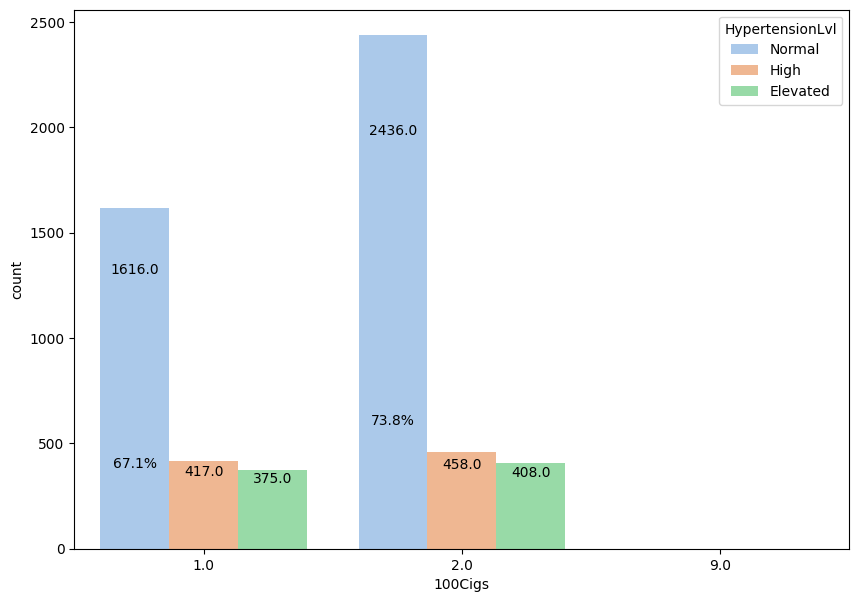

In [4187]:
plot_bivariate('100Cigs', 'HypertensionLvl')

### Years Smoked

In [4188]:
df.loc[df['TimeQuit'] == 66666, 'TimeQuit'] = 50

In [4189]:
# Define the transformation function
def transform_time_quit(row):
    if row['SMQ050U'] == 1:
        return 0
    elif row['SMQ050U'] == 2:
        return (row['TimeQuit'] / 52)
    elif row['SMQ050U'] == 3:
        return (row['TimeQuit'] / 12)
    else:
        return row['TimeQuit']

# Apply the transformation to the TimeQuit column
df['TimeQuit'] = df.apply(transform_time_quit, axis=1)


In [4190]:
# Filter the DataFrame based on the conditions
filtered_df = df[
    (df['AgeLastSmokedReg'].isnull() & df['TimeQuit'].notnull()) |
    (df['AgeLastSmokedReg'].notnull() & df['TimeQuit'].isnull())
]

# Print the filtered DataFrame
filtered_df[['AgeLastSmokedReg', 'TimeQuit', 'Smoker', 'Age', 'AgeStartedSmokingReg']].tail(30)

,AgeLastSmokedReg,TimeQuit,Smoker,Age,AgeStartedSmokingReg
7317,NaN,0.666667,3.0,46,16.0
7370,NaN,0.500000,3.0,38,16.0
7457,NaN,0.583333,3.0,21,13.0
7655,NaN,0.019231,3.0,38,16.0
7695,NaN,0.115385,3.0,46,0.0
7719,NaN,0.500000,3.0,31,16.0
7798,NaN,0.057692,3.0,70,18.0
7800,NaN,0.057692,3.0,39,18.0
7855,NaN,0.166667,3.0,31,30.0
7970,NaN,99999.000000,3.0,75,15.0


In [4191]:
# Update AgeLastSmokedReg where it is null, TimeQuit is not null, and TimeQuit is smaller than 100
df.loc[(df['AgeLastSmokedReg'].isnull()) & (df['TimeQuit'].notnull()) & (df['TimeQuit'] < 100) & (df['Smoker'] == 3) & (df['100Cigs'] == 1), 'AgeLastSmokedReg'] = df['Age'] - df['TimeQuit']

# Verify the changes
print(df.loc[(df['TimeQuit'].notna()), ['Age', 'TimeQuit', 'AgeLastSmokedReg', 'AgeStartedSmokingReg']].head(20))

     Age   TimeQuit  AgeLastSmokedReg  AgeStartedSmokingReg
0     69   3.000000         66.000000                  17.0
2     72  40.000000         26.000000                  20.0
5     56  16.000000         40.000000                  18.0
18    32   0.666667         31.333333                  10.0
36    58  15.000000         25.000000                  19.0
37    57  20.000000         37.000000                   0.0
48    75  17.000000         58.000000                  16.0
57    62  22.000000         40.000000                  16.0
60    36   1.500000         34.000000                  23.0
62    80  45.000000         30.000000                  17.0
68    80  12.000000         70.000000                  16.0
78    71  20.000000         51.000000                  30.0
82    62   5.000000         56.000000                  14.0
84    54   7.000000         47.000000                  15.0
98    59   1.000000         58.000000                  30.0
104   70  25.000000         45.000000   

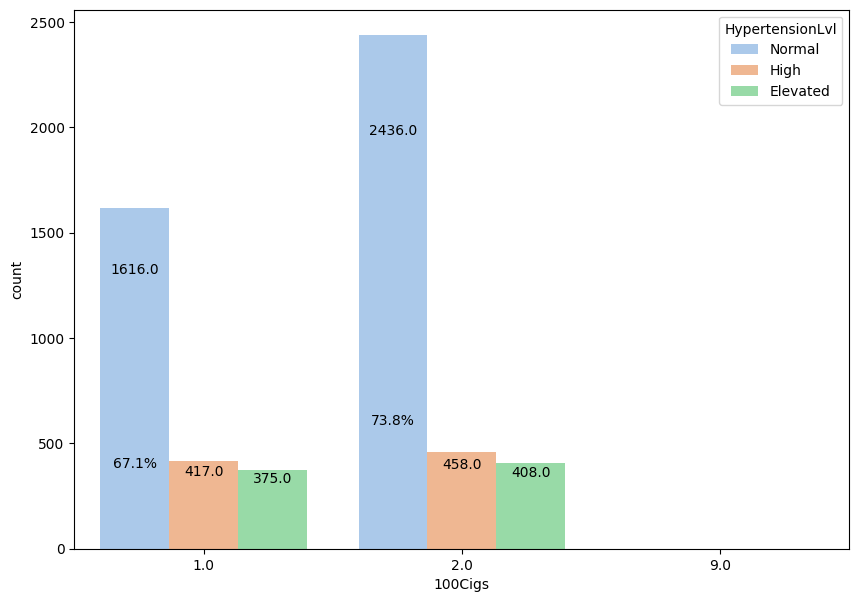

In [4192]:
plot_bivariate('100Cigs', 'HypertensionLvl')

In [4193]:
df.loc[df['AgeStartedSmokingReg'] > 100, 'AgeStartedSmokingReg'] = np.nan
df.loc[df['TimeQuit'] > 66666, 'TimeQuit'] = np.nan
df.loc[df['AgeLastSmokedReg'] > 100, 'AgeLastSmokedReg'] = np.nan
df = df.drop(columns=['SMQ050U'])

df['yearsSmoked'] = np.where(
    df['Smoker'].isin([1, 2]),
    df['Age'] - df['AgeStartedSmokingReg'],
    df['AgeLastSmokedReg'] - df['AgeStartedSmokingReg']
)

df['yearsSmoked'] = df['yearsSmoked'].fillna(0)

C:\Users\larry\AppData\Local\Temp\ipykernel_35636\3170566072.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('yearsSmokedBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


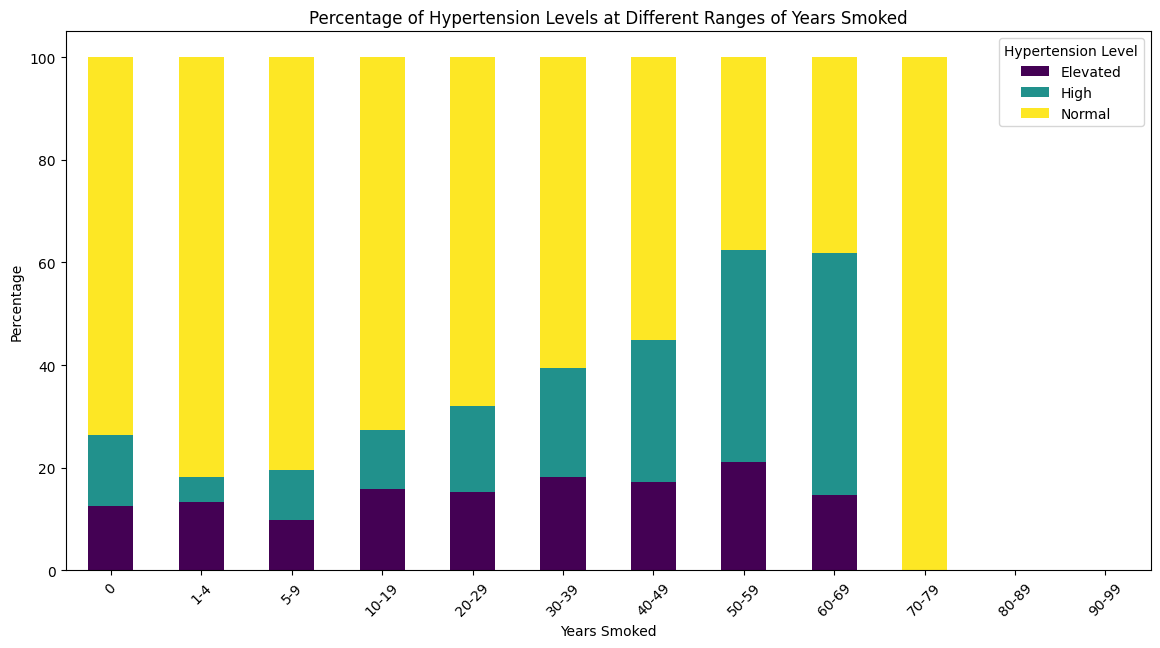

In [4194]:
# Bin the yearsSmoked values
bins = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0', '1-4', '5-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['yearsSmokedBinned'] = pd.cut(df['yearsSmoked'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of yearsSmoked
hypertension_percentage = df.groupby('yearsSmokedBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels at Different Ranges of Years Smoked')
plt.xlabel('Years Smoked')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

In [4195]:
# Filter the DataFrame for rows where Smoker is 1 or 2 and AvgCigs/Day is NaN
filtered_df = df[(df['Smoker'].isin([1, 2])) & (df['DaysSmokedInLast30'] == 0)]

# Print the filtered rows
print(filtered_df[['Smoker', 'DaysSmokedInLast30']].head(20))

      Smoker  DaysSmokedInLast30
2075     2.0                 0.0
2936     2.0                 0.0
3324     2.0                 0.0
4521     2.0                 0.0
5069     2.0                 0.0
5340     2.0                 0.0
5358     2.0                 0.0
5806     2.0                 0.0
6824     2.0                 0.0
6880     2.0                 0.0
7791     2.0                 0.0
9261     2.0                 0.0


In [4196]:
# Filter the DataFrame for the specified conditions
filtered_df = df[df['WhenSmokedCigs/Day'].isnull()]

# Print the value counts of the filtered rows
print(filtered_df['HypertensionLvl'].value_counts())

HypertensionLvl
Normal      3247
High         630
Elevated     571
Name: count, dtype: int64


In [4197]:
# Define the transformation function
def calculate_lifetime_cigarettes(row):
    if row['Smoker'] == 3:
        if pd.isnull(row['WhenSmokedCigs/Day']) | (row['WhenSmokedCigs/Day'] > 100):
            return 0
        return row['yearsSmoked'] * row['WhenSmokedCigs/Day'] * 365
    elif row['Smoker'] in [1, 2]:
        if pd.isnull(row['AvgCigs/DayInLast30']) | (row['AvgCigs/DayInLast30'] > 100):
            return 0
        return row['yearsSmoked'] * row['AvgCigs/DayInLast30'] * row['DaysSmokedInLast30'] /30 * 365
    else:
        return np.nan

# Apply the transformation to create the lifetimeCigarettes feature
df['lifetimeCigarettes'] = df.apply(calculate_lifetime_cigarettes, axis=1)

# Verify the changes
print(df[['Smoker', 'yearsSmoked', 'WhenSmokedCigs/Day', 'AvgCigs/DayInLast30', 'DaysSmokedInLast30', 'lifetimeCigarettes']].head(20))

    Smoker  yearsSmoked  WhenSmokedCigs/Day  AvgCigs/DayInLast30  \
0      3.0    49.000000                 2.0                  NaN   
1      2.0    54.000000                 NaN                  1.0   
2      3.0     6.000000                 3.0                  NaN   
4      3.0     0.000000                 NaN                  NaN   
5      3.0    22.000000                 5.0                  NaN   
7      3.0     0.000000                 NaN                  NaN   
8      1.0    23.000000                 NaN                  1.0   
9      1.0    44.000000                 NaN                 25.0   
10     3.0     0.000000                 NaN                  NaN   
12     3.0     0.000000                 NaN                  NaN   
15     3.0     0.000000                 NaN                  NaN   
18     3.0    21.333333                20.0                  NaN   
19     3.0     0.000000                 NaN                  NaN   
21     3.0     0.000000                 NaN     

In [4198]:
# Filter the DataFrame for the specified conditions
filtered_df = df[(df['lifetimeCigarettes'] < 100) & (df['HypertensionLvl'].isin(['Elevated', 'High']))]

# Print the value counts of the filtered rows
print(filtered_df['HypertensionLvl'].value_counts())

HypertensionLvl
High        473
Elevated    422
Name: count, dtype: int64


C:\Users\larry\AppData\Local\Temp\ipykernel_35636\2307530192.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('lifetimeCigarettesBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


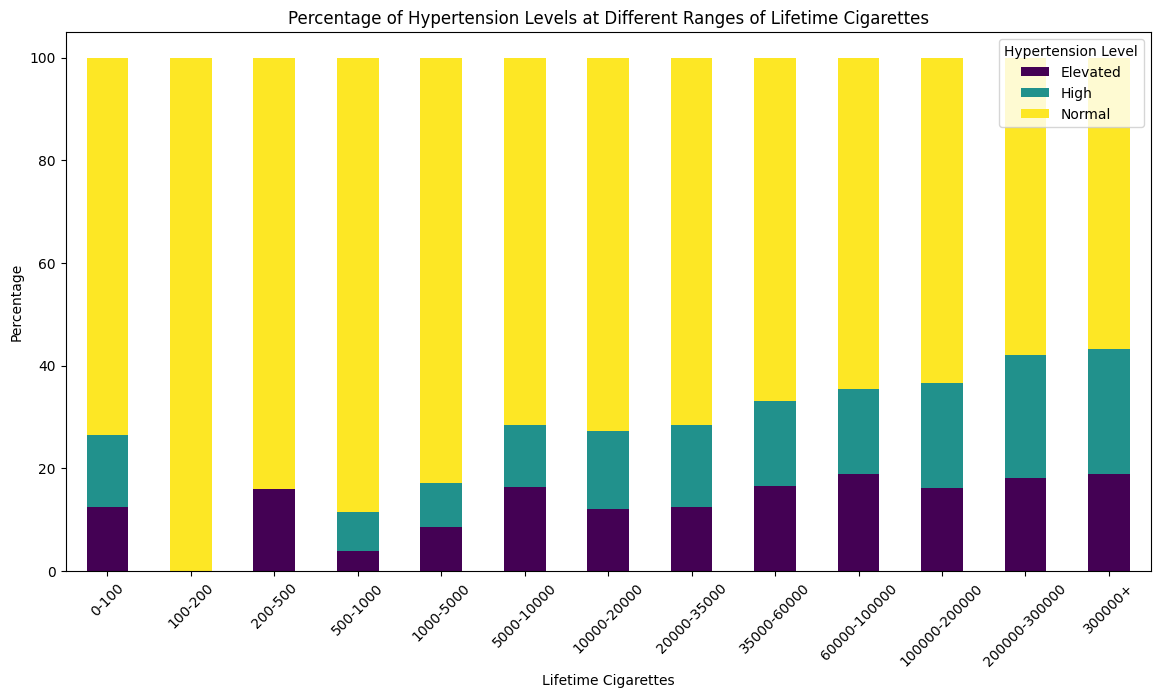

In [4199]:
# Bin the lifetimeCigarettes values
bins = [0, 100, 200, 500, 1000, 5000, 10000, 20000, 35000, 60000, 100000, 200000, 300000, 1000000000000]
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-5000', '5000-10000', '10000-20000', '20000-35000', '35000-60000', '60000-100000', '100000-200000', '200000-300000', '300000+']
df['lifetimeCigarettesBinned'] = pd.cut(df['lifetimeCigarettes'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of lifetimeCigarettes
hypertension_percentage = df.groupby('lifetimeCigarettesBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels at Different Ranges of Lifetime Cigarettes')
plt.xlabel('Lifetime Cigarettes')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

### Alcohol

In [4200]:
print(df.loc[df['AlcConsumpFreq'] > 7].value_counts)

<bound method DataFrame.value_counts of          ID  Gender  Age  EducationLvl  DiasBP1  DiasBP2  DiasBP3  SysBP1  \
18    73577       1   32           1.0     74.0     74.0     78.0   118.0   
84    73645       2   54           4.0     68.0     72.0     70.0   124.0   
161   73726       2   67           3.0     86.0     84.0      NaN   148.0   
261   73833       2   34           5.0     42.0     60.0     66.0    96.0   
377   73952       1   42           4.0     68.0     72.0     82.0   114.0   
...     ...     ...  ...           ...      ...      ...      ...     ...   
9603  83516       2   66           3.0     70.0     64.0     64.0   144.0   
9743  83662       1   80           4.0     76.0     66.0     56.0   194.0   
9755  83674       1   40           5.0     76.0     80.0     76.0   126.0   
9765  83684       1   80           5.0     78.0     72.0     74.0   134.0   
9783  83702       2   80           4.0     86.0     84.0     94.0   154.0   

      SysBP2  SysBP3  ...  DaysSmok

In [4201]:
def transform_alc_consump_freq(row):
    if row['UnitAlc'] == 1:
        return (row['AlcConsumpFreq'] * 52)
    elif row['UnitAlc'] == 2:
        return (row['AlcConsumpFreq'] * 12)
    else:
        if (row['AlcConsumpFreq'] > 365):
            return np.nan
        return row['AlcConsumpFreq']
    

df['AlcConsumpFreq'] = df.apply(transform_alc_consump_freq, axis=1)

In [4202]:
print(df.loc[df['AlcConsumpFreq'] > 7].value_counts)

<bound method DataFrame.value_counts of          ID  Gender  Age  EducationLvl  DiasBP1  DiasBP2  DiasBP3  SysBP1  \
1     73558       1   54           3.0     62.0     80.0     42.0   156.0   
8     73566       2   56           3.0     74.0     72.0     72.0   128.0   
9     73567       1   65           2.0     78.0     78.0     76.0   140.0   
10    73568       2   26           5.0     60.0     62.0     66.0   106.0   
18    73577       1   32           1.0     74.0     74.0     78.0   118.0   
...     ...     ...  ...           ...      ...      ...      ...     ...   
9784  83703       1   22           2.0     64.0     66.0     64.0   128.0   
9788  83707       1   18           NaN     54.0     50.0     54.0   106.0   
9790  83709       1   24           2.0     62.0     64.0     66.0   116.0   
9802  83721       1   52           5.0     70.0     72.0     76.0   108.0   
9808  83727       1   26           5.0     68.0     74.0     76.0   110.0   

      SysBP2  SysBP3  ...  DaysSmok

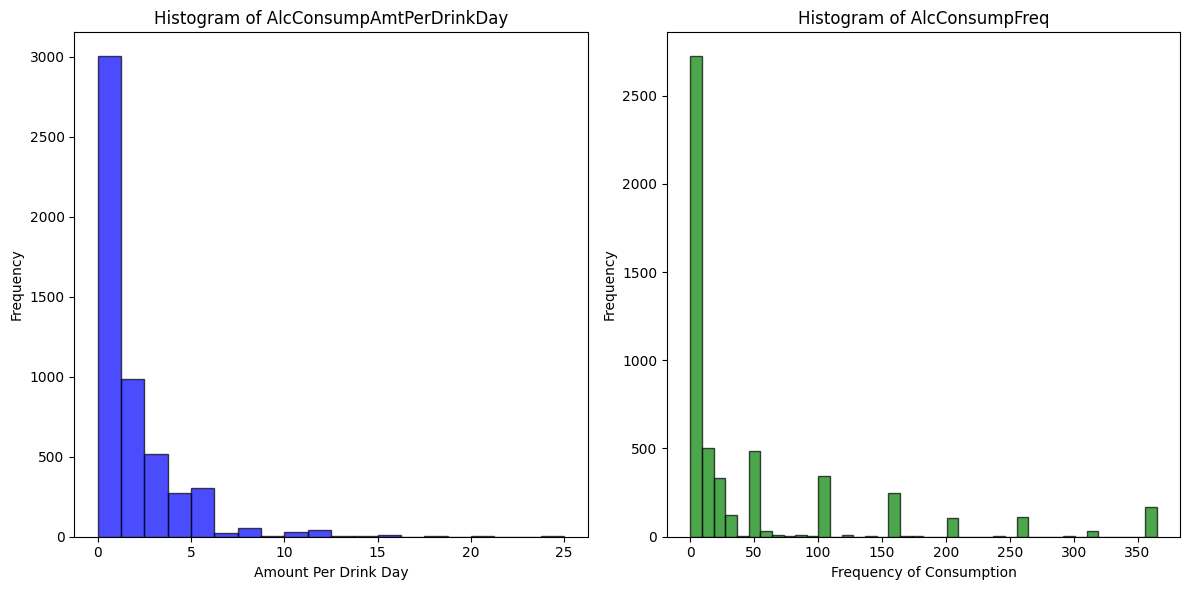

In [4203]:
filtered_df = df[df['AlcConsumpAmtPerDrinkDay'] < 77]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Histogram for AlcConsumpAmtPerDrinkDay
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(filtered_df['AlcConsumpAmtPerDrinkDay'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of AlcConsumpAmtPerDrinkDay')
plt.xlabel('Amount Per Drink Day')
plt.ylabel('Frequency')

# Histogram for AlcConsumpFreq
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(filtered_df['AlcConsumpFreq'], bins=40, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of AlcConsumpFreq')
plt.xlabel('Frequency of Consumption')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [4204]:
# Set values in 'AlcConsumpAmtPerDrinkDay' to NaN where the condition is met
df.loc[df['AlcConsumpAmtPerDrinkDay'] > 25, 'AlcConsumpAmtPerDrinkDay'] = np.nan

# Calculate the new column 'AlcConsump/Yr' by multiplying the relevant columns
df['AlcConsump/Yr'] = df['AlcConsumpAmtPerDrinkDay'] * df['AlcConsumpFreq']

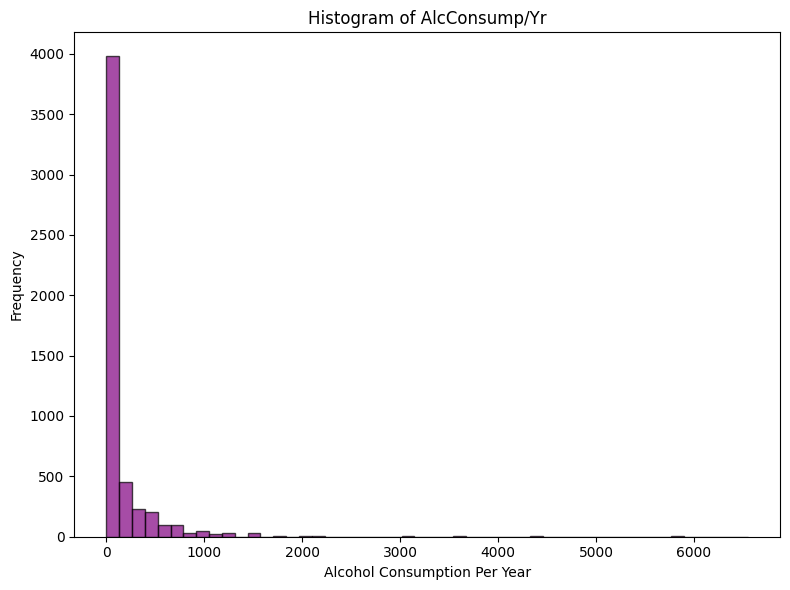

In [4205]:
plt.figure(figsize=(8, 6))

# Histogram for AlcConsump/Yr
plt.hist(df['AlcConsump/Yr'], bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of AlcConsump/Yr')
plt.xlabel('Alcohol Consumption Per Year')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\larry\AppData\Local\Temp\ipykernel_35636\981419561.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('AlcConsumpFreqBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


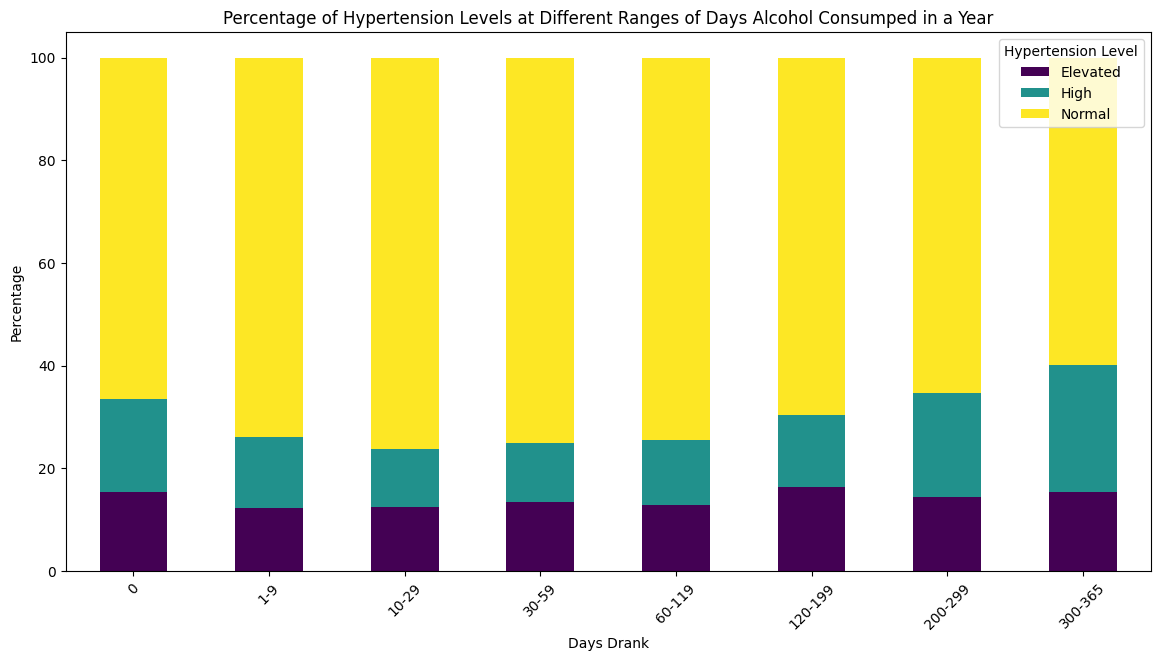

In [4206]:
# Bin the yearsSmoked values
bins = [0, 1, 10, 30, 60, 120, 200, 299, 366]
labels = ['0', '1-9', '10-29', '30-59', '60-119', '120-199', '200-299', '300-365']
df['AlcConsumpFreqBinned'] = pd.cut(df['AlcConsumpFreq'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of yearsSmoked
hypertension_percentage = df.groupby('AlcConsumpFreqBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels at Different Ranges of Days Alcohol Consumped in a Year')
plt.xlabel('Days Drank')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

C:\Users\larry\AppData\Local\Temp\ipykernel_35636\2105518333.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hypertension_percentage = df.groupby('AlcConsump/YrBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100


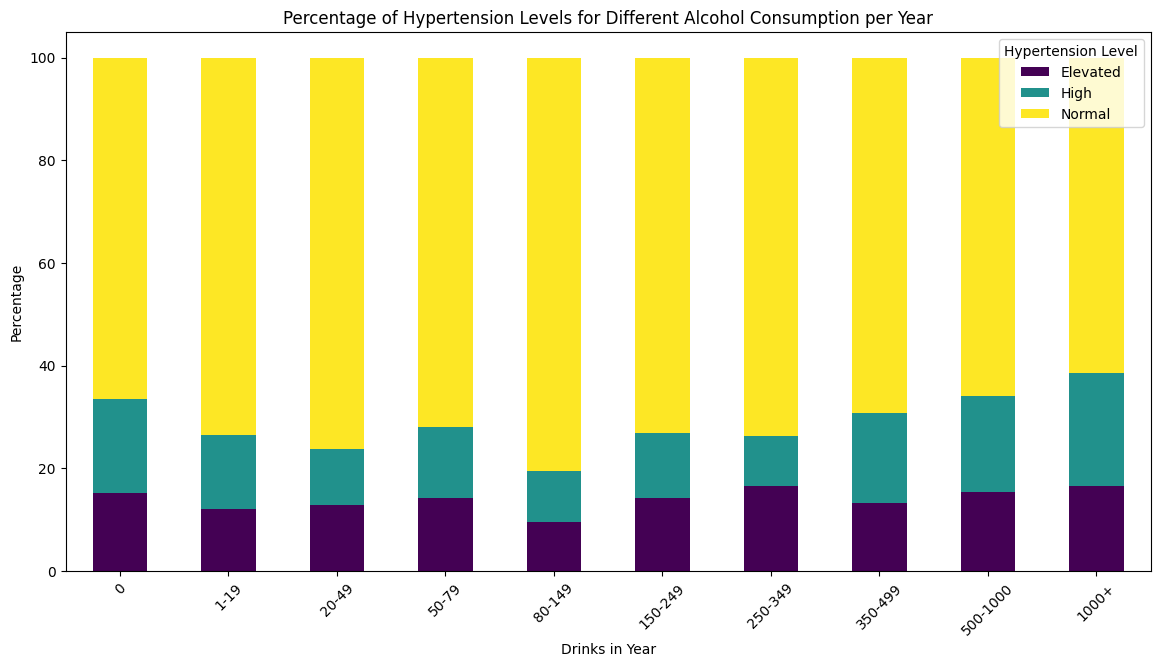

In [4207]:
# Bin the yearsSmoked values
bins = [0, 1, 20, 50, 80, 150, 250, 350, 500, 1000, 1000000000]
labels = ['0', '1-19', '20-49', '50-79', '80-149', '150-249', '250-349', '350-499', '500-1000', '1000+']
df['AlcConsump/YrBinned'] = pd.cut(df['AlcConsump/Yr'], bins=bins, labels=labels, right=False)

# Calculate the percentage of hypertension levels for each bin of yearsSmoked
hypertension_percentage = df.groupby('AlcConsump/YrBinned')['HypertensionLvl'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the data
plt.figure(figsize=(14, 7))
hypertension_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Percentage of Hypertension Levels for Different Alcohol Consumption per Year')
plt.xlabel('Drinks in Year')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Level')
plt.xticks(rotation=45)
plt.show()

In [4208]:
def plot_univariate(col):
    if(df[col].nunique()>2):
        plt.figure(figsize=(10,7))
        h = 0.15
        rot=90
    else:
        plt.figure(figsize=(6,6))
        h = 0.5
        rot=0
    plot = sns.countplot(x = df[col], palette='pastel')
    
    for bars in plot.containers:
        for p in bars:
            plot.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5, p.get_height()), 
                    ha = 'center', va = 'bottom')
            plot.annotate(f'{p.get_height()*100/df[col].shape[0] : .1f}%', (p.get_x() + p.get_width()*0.5, h*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=rot)  

C:\Users\larry\AppData\Local\Temp\ipykernel_35636\1611043242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = df[col], palette='pastel')


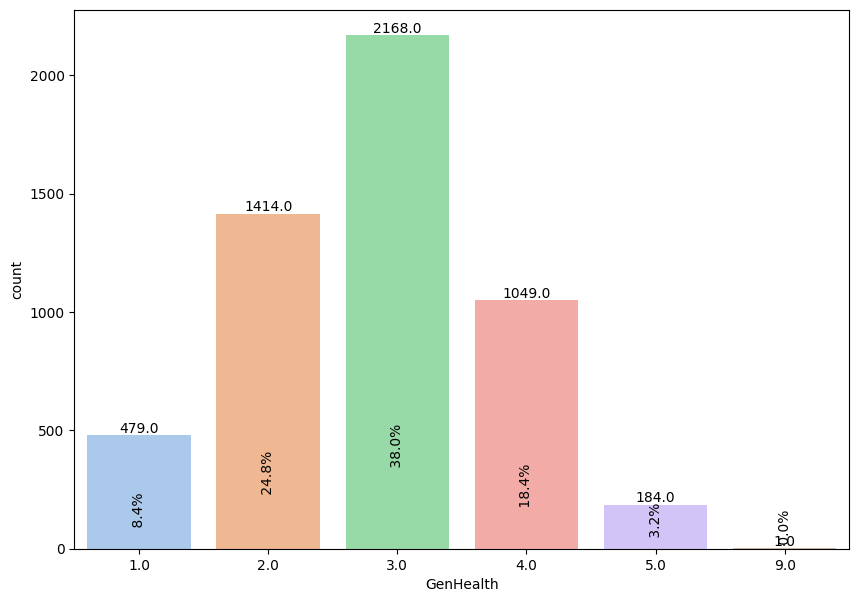

In [4209]:
plot_univariate('GenHealth')

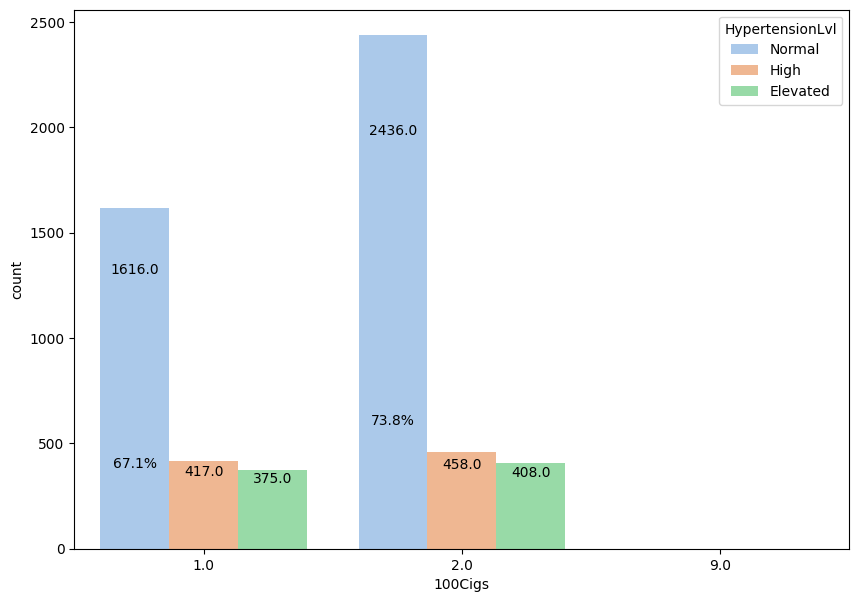

In [4210]:
plot_bivariate('100Cigs', 'HypertensionLvl')

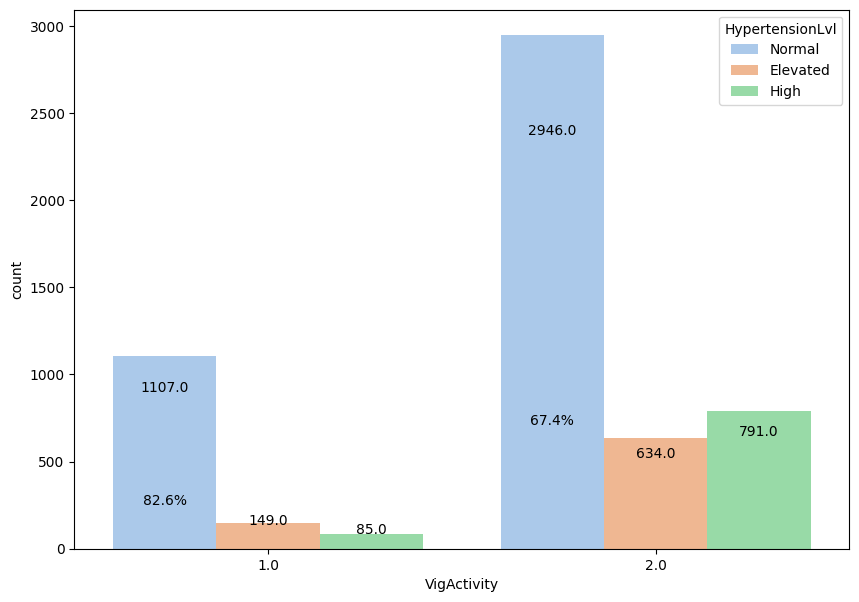

In [4211]:
plot_bivariate('VigActivity', 'HypertensionLvl')

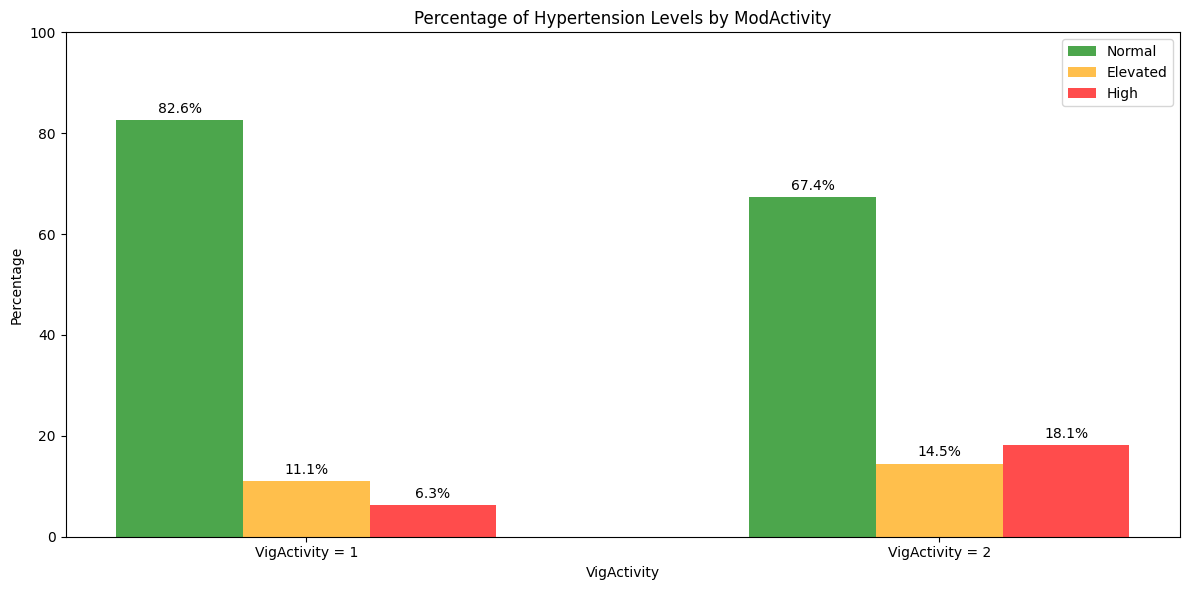

In [4212]:
# Count records for each Hypertension Level when ModActivity = 1
high_hypertension_vig_1 = df[(df['HypertensionLvl'] == 'High') & (df['VigActivity'] == 1)].shape[0]
elevated_hypertension_vig_1 = df[(df['HypertensionLvl'] == 'Elevated') & (df['VigActivity'] == 1)].shape[0]
normal_hypertension_vig_1 = df[(df['HypertensionLvl'] == 'Normal') & (df['VigActivity'] == 1)].shape[0]

# Count records for each Hypertension Level when ModActivity = 2
high_hypertension_vig_2 = df[(df['HypertensionLvl'] == 'High') & (df['VigActivity'] == 2)].shape[0]
elevated_hypertension_vig_2 = df[(df['HypertensionLvl'] == 'Elevated') & (df['VigActivity'] == 2)].shape[0]
normal_hypertension_vig_2 = df[(df['HypertensionLvl'] == 'Normal') & (df['VigActivity'] == 2)].shape[0]

# Calculate total counts for each ModActivity
total_vig_1 = high_hypertension_vig_1 + elevated_hypertension_vig_1 + normal_hypertension_vig_1
total_vig_2 = high_hypertension_vig_2 + elevated_hypertension_vig_2 + normal_hypertension_vig_2

# Calculate percentages
percentages_vig_1 = [
    (normal_hypertension_vig_1 / total_vig_1) * 100,
    (elevated_hypertension_vig_1 / total_vig_1) * 100,
    (high_hypertension_vig_1 / total_vig_1) * 100
]

percentages_vig_2 = [
    (normal_hypertension_vig_2 / total_vig_2) * 100,
    (elevated_hypertension_vig_2 / total_vig_2) * 100,
    (high_hypertension_vig_2 / total_vig_2) * 100
]

# Data for plotting
labels = ['VigActivity = 1', 'VigActivity = 2']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the bars for each Hypertension Level next to each other
bar1 = plt.bar(x - width, [percentages_vig_1[0], percentages_vig_2[0]], width, label='Normal', color='green', alpha=0.7)
bar2 = plt.bar(x, [percentages_vig_1[1], percentages_vig_2[1]], width, label='Elevated', color='orange', alpha=0.7)
bar3 = plt.bar(x + width, [percentages_vig_1[2], percentages_vig_2[2]], width, label='High', color='red', alpha=0.7)

# Add percentages on top of the bars
for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        plt.annotate(f'{height:.1f}%',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('VigActivity')
plt.ylabel('Percentage')
plt.title('Percentage of Hypertension Levels by ModActivity')
plt.xticks(x, labels)
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentages
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


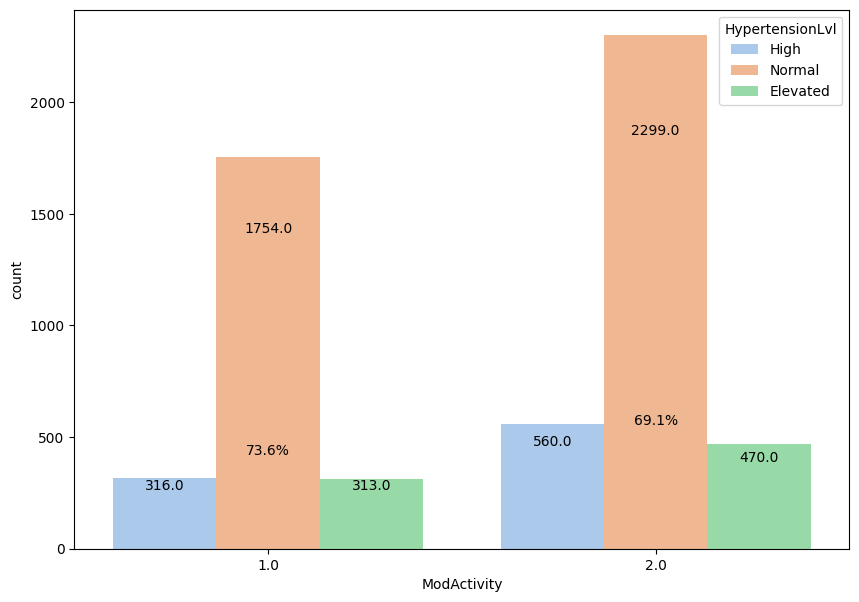

In [4213]:
plot_bivariate('ModActivity', 'HypertensionLvl')

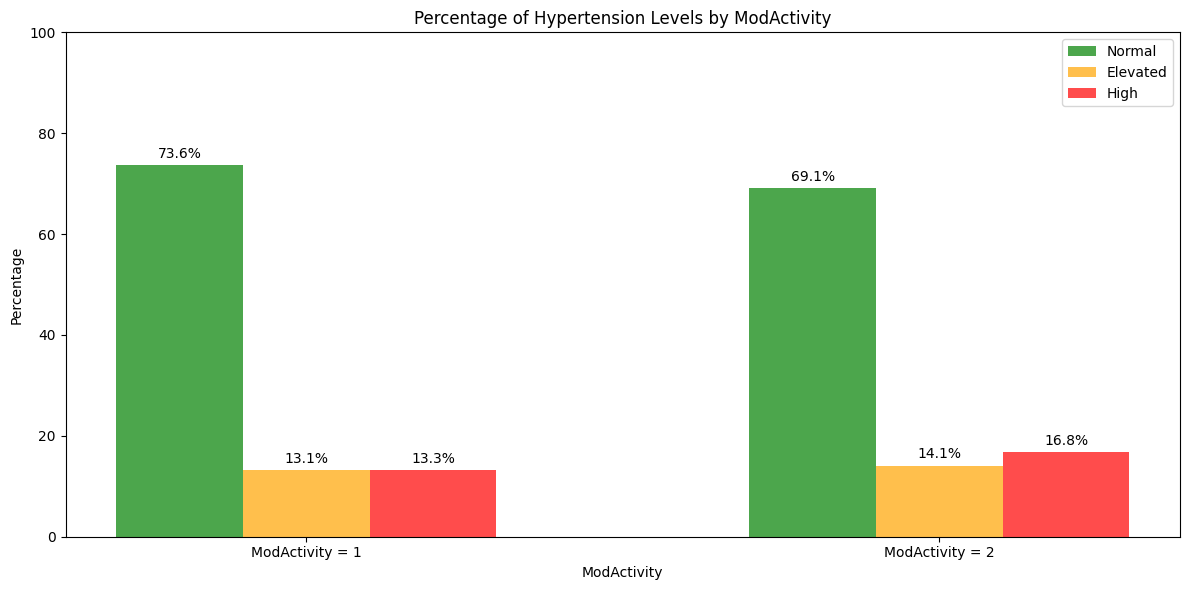

In [4214]:
# Count records for each Hypertension Level when ModActivity = 1
high_hypertension_mod_1 = df[(df['HypertensionLvl'] == 'High') & (df['ModActivity'] == 1)].shape[0]
elevated_hypertension_mod_1 = df[(df['HypertensionLvl'] == 'Elevated') & (df['ModActivity'] == 1)].shape[0]
normal_hypertension_mod_1 = df[(df['HypertensionLvl'] == 'Normal') & (df['ModActivity'] == 1)].shape[0]

# Count records for each Hypertension Level when ModActivity = 2
high_hypertension_mod_2 = df[(df['HypertensionLvl'] == 'High') & (df['ModActivity'] == 2)].shape[0]
elevated_hypertension_mod_2 = df[(df['HypertensionLvl'] == 'Elevated') & (df['ModActivity'] == 2)].shape[0]
normal_hypertension_mod_2 = df[(df['HypertensionLvl'] == 'Normal') & (df['ModActivity'] == 2)].shape[0]

# Calculate total counts for each ModActivity
total_mod_1 = high_hypertension_mod_1 + elevated_hypertension_mod_1 + normal_hypertension_mod_1
total_mod_2 = high_hypertension_mod_2 + elevated_hypertension_mod_2 + normal_hypertension_mod_2

# Calculate percentages
percentages_mod_1 = [
    (normal_hypertension_mod_1 / total_mod_1) * 100,
    (elevated_hypertension_mod_1 / total_mod_1) * 100,
    (high_hypertension_mod_1 / total_mod_1) * 100
]

percentages_mod_2 = [
    (normal_hypertension_mod_2 / total_mod_2) * 100,
    (elevated_hypertension_mod_2 / total_mod_2) * 100,
    (high_hypertension_mod_2 / total_mod_2) * 100
]

# Data for plotting
labels = ['ModActivity = 1', 'ModActivity = 2']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the bars for each Hypertension Level next to each other
bar1 = plt.bar(x - width, [percentages_mod_1[0], percentages_mod_2[0]], width, label='Normal', color='green', alpha=0.7)
bar2 = plt.bar(x, [percentages_mod_1[1], percentages_mod_2[1]], width, label='Elevated', color='orange', alpha=0.7)
bar3 = plt.bar(x + width, [percentages_mod_1[2], percentages_mod_2[2]], width, label='High', color='red', alpha=0.7)

# Add percentages on top of the bars
for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        plt.annotate(f'{height:.1f}%',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Add some text for labels, title, and custom x-axis tick labels
plt.xlabel('ModActivity')
plt.ylabel('Percentage')
plt.title('Percentage of Hypertension Levels by ModActivity')
plt.xticks(x, labels)
plt.ylim(0, 100)  # Set y-axis limit to 100 for percentages
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [4215]:
# Filter the DataFrame for records where ModActivity = 2 and VigActivity = 1
vig_activity_no_mod_activity = df[(df['ModActivity'] == 2) & (df['VigActivity'] == 1)]

# Print the filtered records with selected columns
print(vig_activity_no_mod_activity.loc[:, ['Age', 'ModActivity', 'VigActivity']])

      Age  ModActivity  VigActivity
22     50          2.0          1.0
39     20          2.0          1.0
64     32          2.0          1.0
68     80          2.0          1.0
73     43          2.0          1.0
...   ...          ...          ...
9709   58          2.0          1.0
9719   25          2.0          1.0
9780   37          2.0          1.0
9788   18          2.0          1.0
9801   36          2.0          1.0

[514 rows x 3 columns]


In [4216]:
# Filter the DataFrame for records where ModActivity = 1 and VigActivity = 1
vig_activity_and_mod_activity = df[(df['ModActivity'] == 1) & (df['VigActivity'] == 1)]

# Print the filtered records with selected columns
print(vig_activity_and_mod_activity.loc[:, ['Age', 'ModActivity', 'VigActivity']])

      Age  ModActivity  VigActivity
12     76          1.0          1.0
19     18          1.0          1.0
26     28          1.0          1.0
57     62          1.0          1.0
93     44          1.0          1.0
...   ...          ...          ...
9759   42          1.0          1.0
9764   33          1.0          1.0
9769   29          1.0          1.0
9790   24          1.0          1.0
9802   52          1.0          1.0

[827 rows x 3 columns]


Clearly, people may perform only vigrous activity and not moderate activity, or both vigorous and moderate activity. Vigorous activity has a bigger impact on hypertension compared to moderate activity

In [4217]:
#Combine vig and mod activity

df['ActivityLvl'] = df.apply(
    lambda row: 1 if row['VigActivity'] == 1 
    else (0.5 if row['VigActivity'] != 1 and row['ModActivity'] == 1 else 0), axis=1
)

df['WeightedActivity'] = df.apply(
    lambda row: (row['VigActivity'] * 2 if row['VigActivity'] == 1 else 0) + 
                (row['ModActivity'] if row['ModActivity'] == 1 else 0), axis=1
)

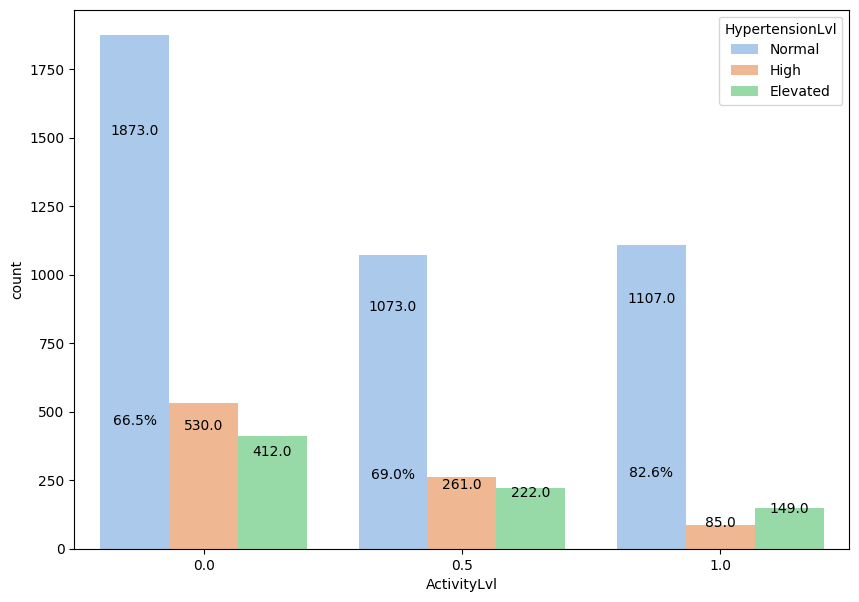

In [4218]:
plot_bivariate('ActivityLvl', 'HypertensionLvl')

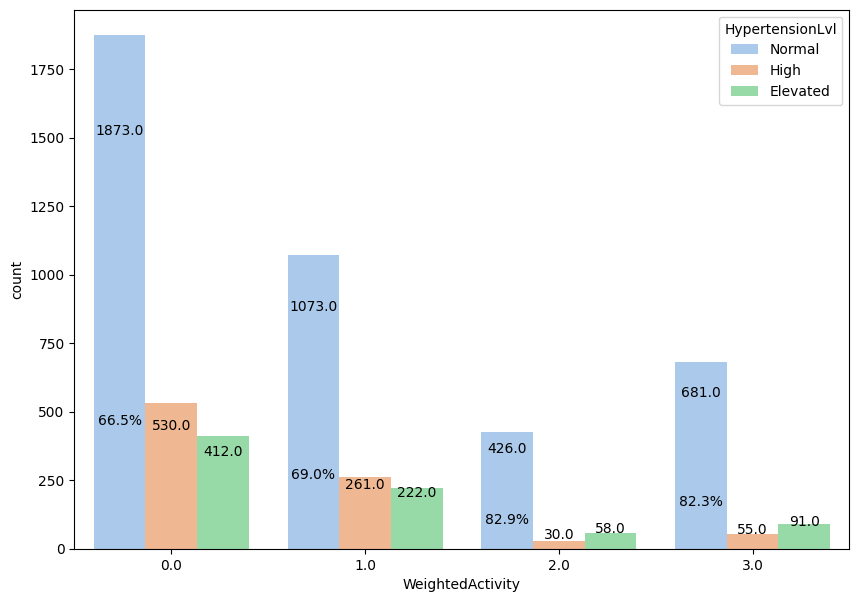

In [4219]:
plot_bivariate('WeightedActivity', 'HypertensionLvl')

In [4220]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_distribution(df, columns, threshold=7):
    # Loop through each specified column (feature) in the columns list
    for column in columns:
        # Check if the column exists in the df
        if column in df.columns:
            # Filter the data to include only values smaller than the threshold and skip null values
            filtered_data = df[column].dropna()
            filtered_data = filtered_data[filtered_data < threshold]
            
            # Check if the filtered data is not empty and contains valid numerical values
            if not filtered_data.empty and filtered_data.min() != filtered_data.max():
                # Plot the histogram for the filtered data with narrower bars
                plt.figure(figsize=(8, 5))
                plt.hist(filtered_data, bins=range(int(filtered_data.min()), int(filtered_data.max()) + 2), 
                         alpha=0.7, color='blue', edgecolor='black', width=0.5)  # Adjust 'width' for narrower bars
                
                # Set titles and labels
                plt.title(f'Frequency Distribution of {column}')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                
                # Show the plot
                plt.show()
            else:
                print(f"No valid data to plot for column '{column}'.")
        else:
            print(f"Column '{column}' not found in the df.")


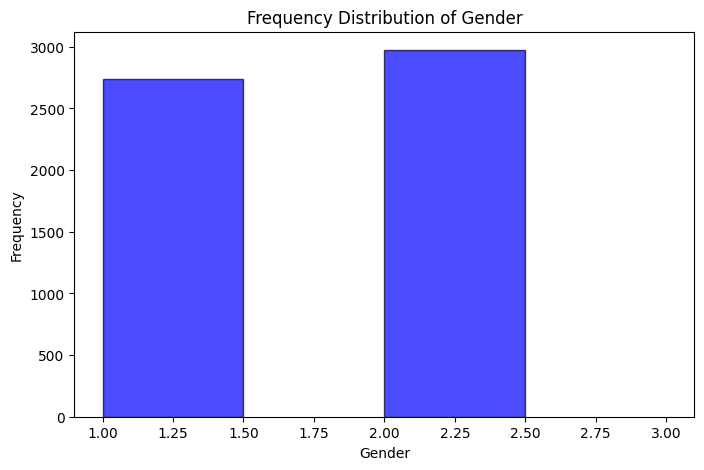

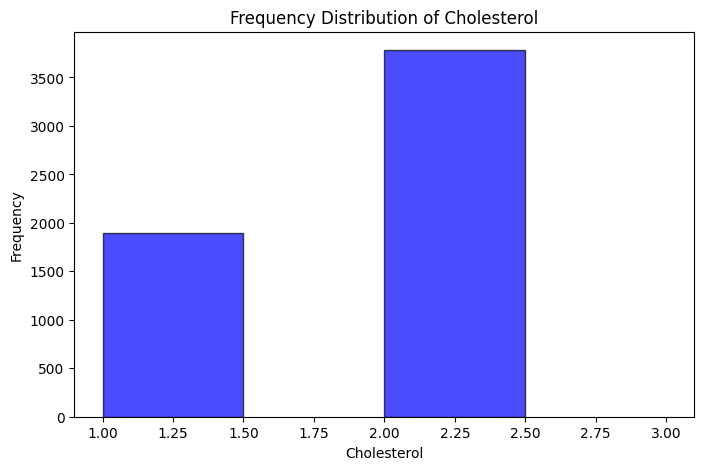

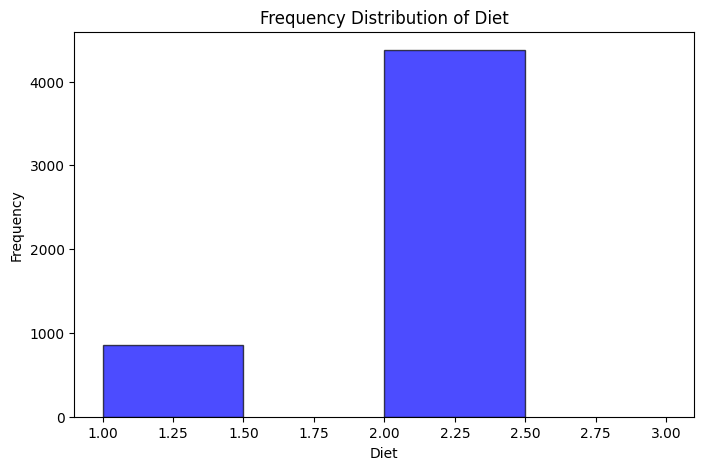

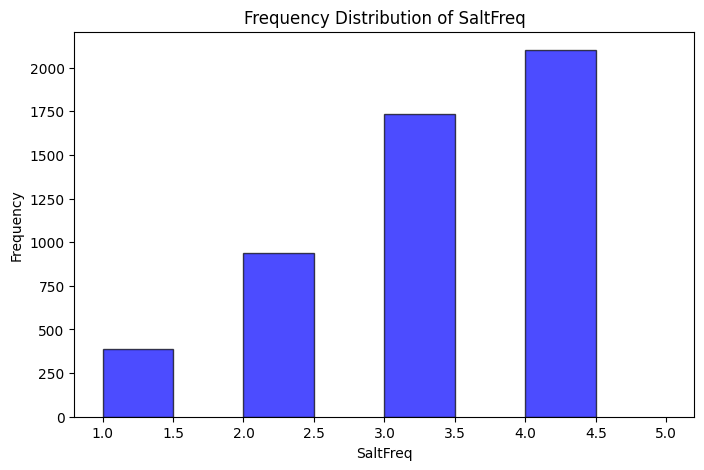

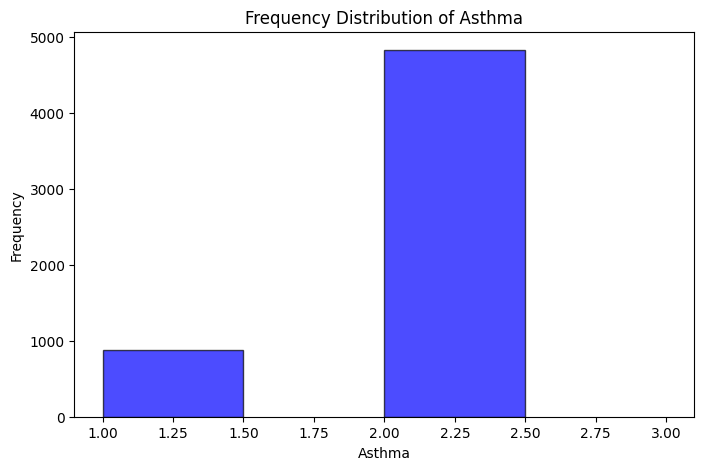

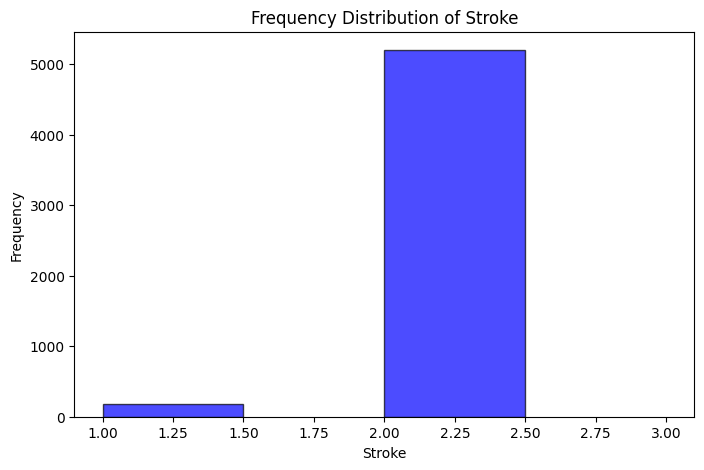

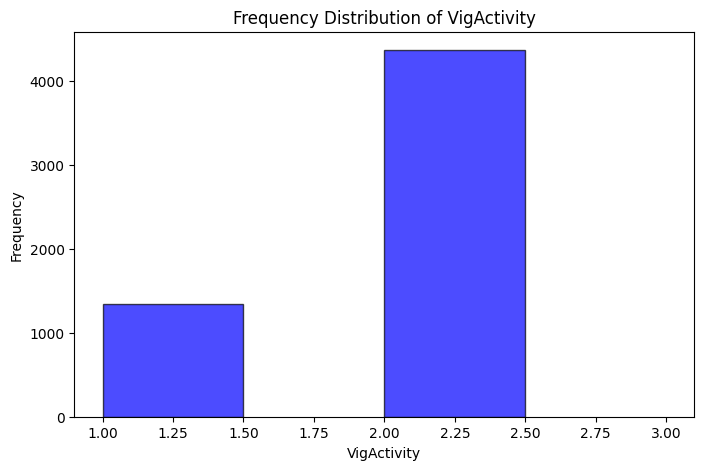

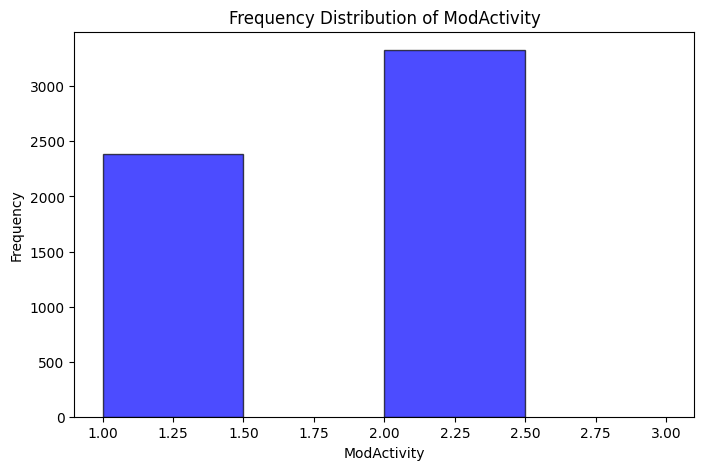

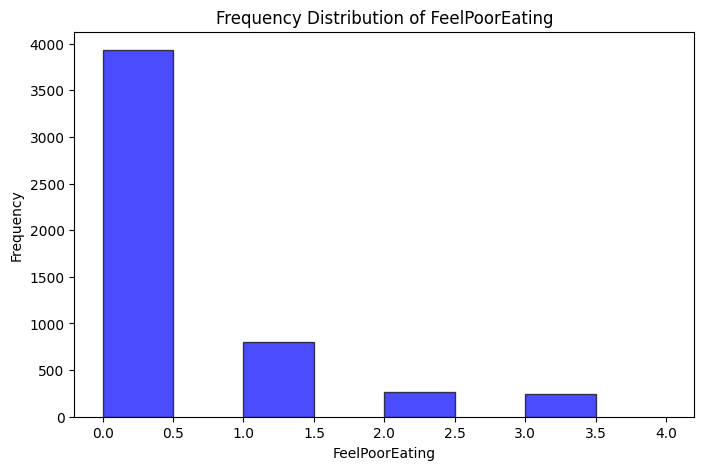

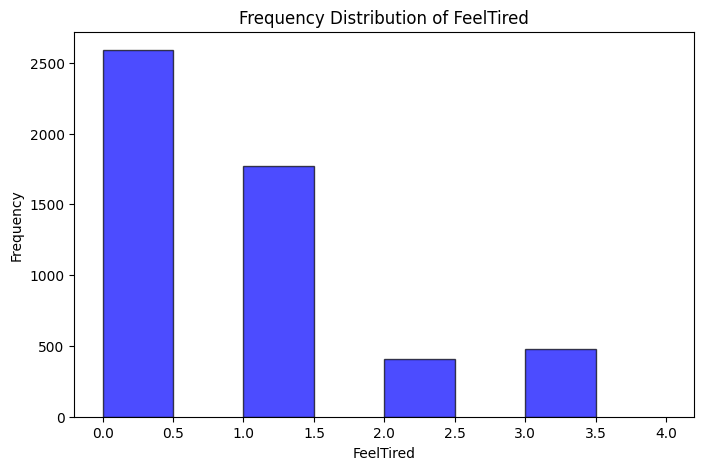

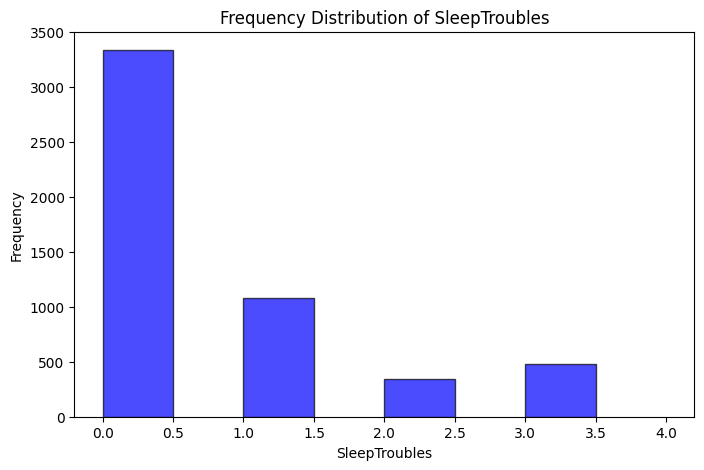

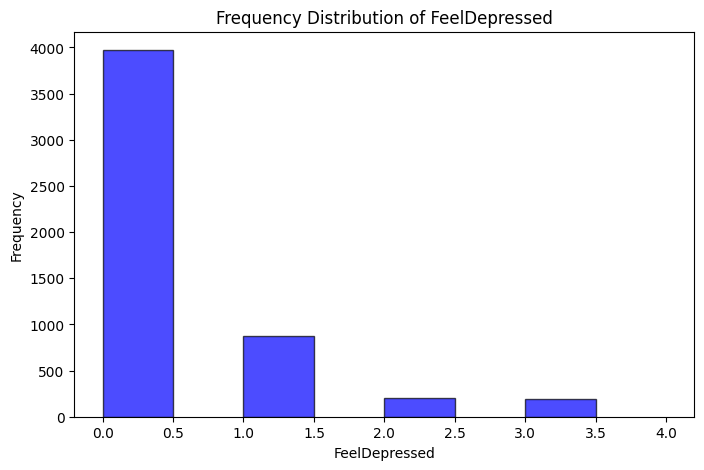

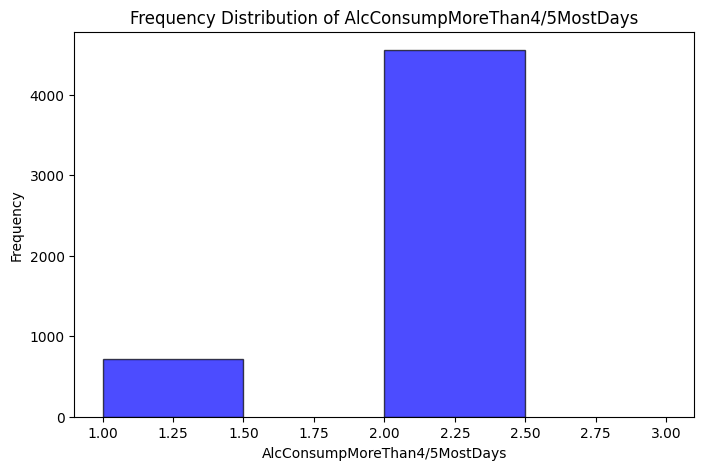

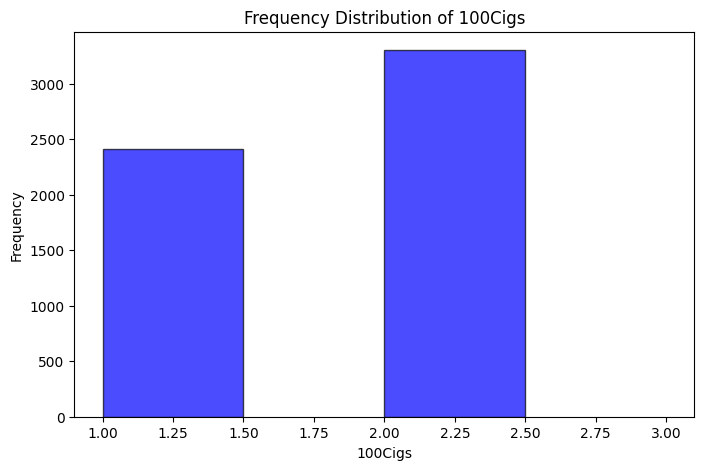

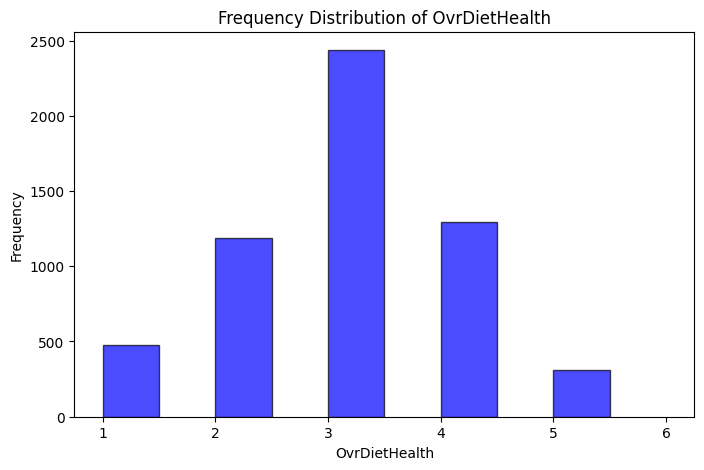

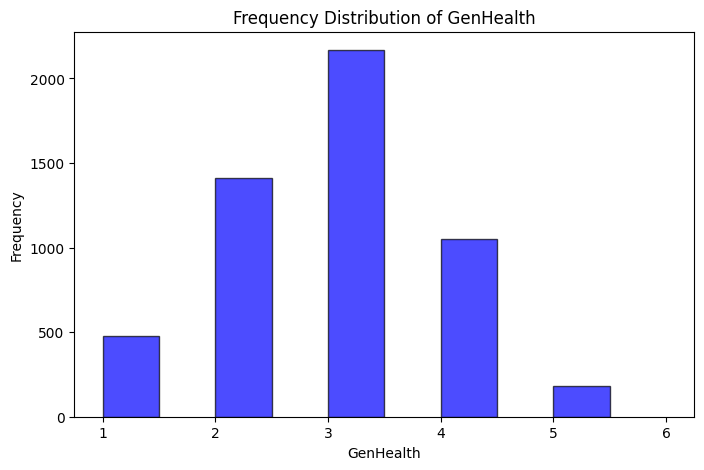

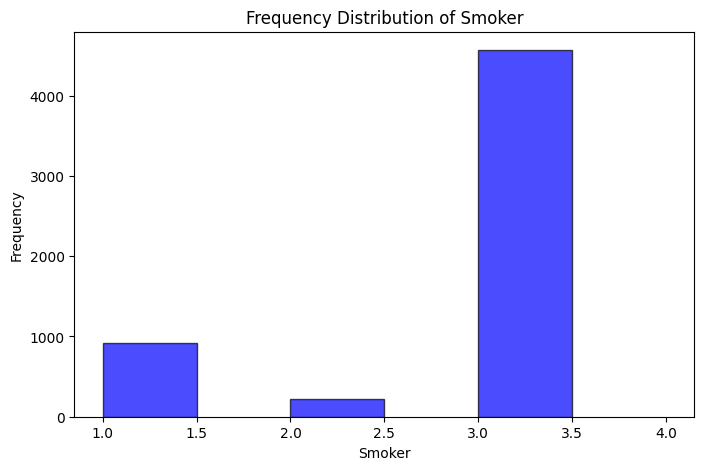

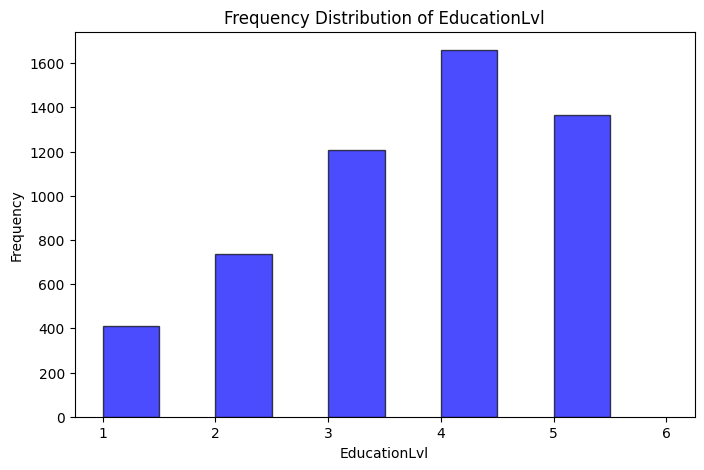

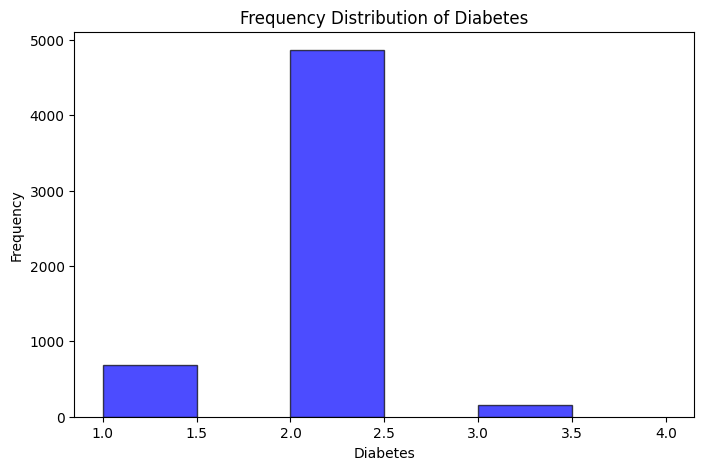

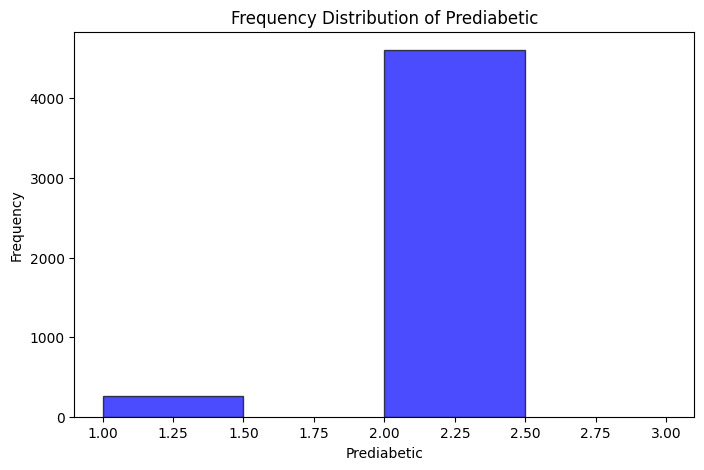

In [4221]:
features_seven = ['Gender','Cholesterol','Diet','SaltFreq','Asthma', 'Stroke', 'VigActivity','ModActivity','FeelPoorEating','FeelTired','SleepTroubles','FeelDepressed','AlcConsumpMoreThan4/5MostDays','100Cigs','OvrDietHealth','GenHealth','Smoker','EducationLvl','Diabetes','Prediabetic']
plot_feature_distribution(df, features_seven)

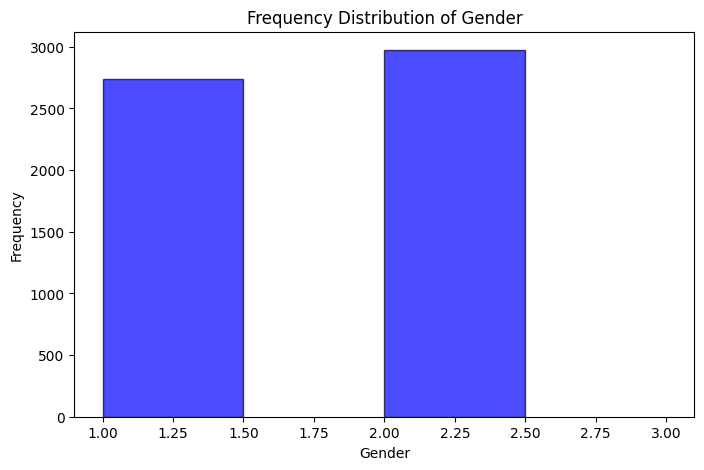

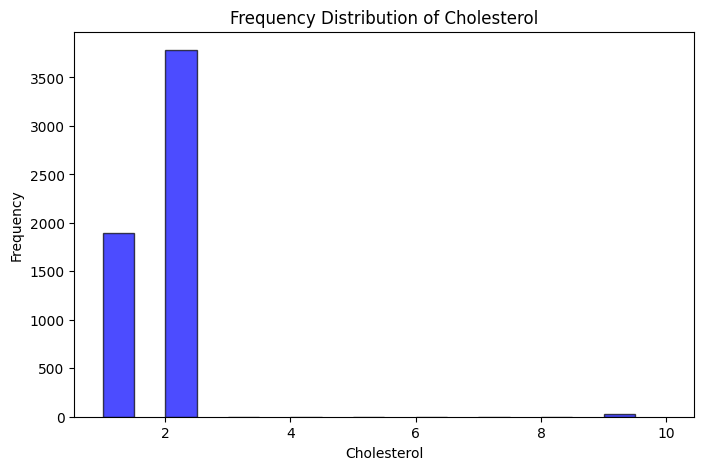

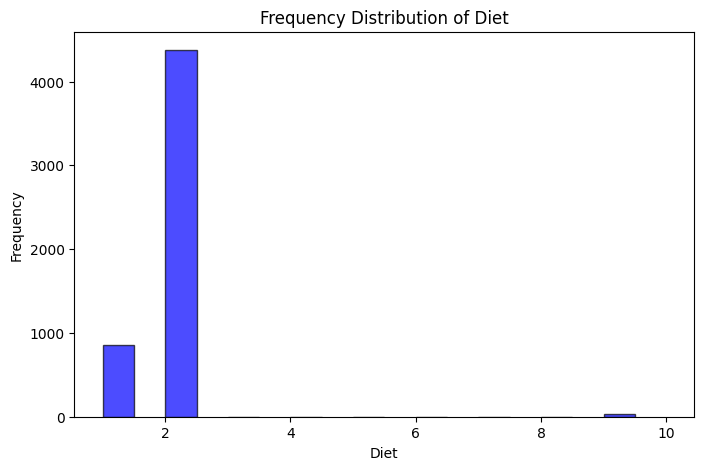

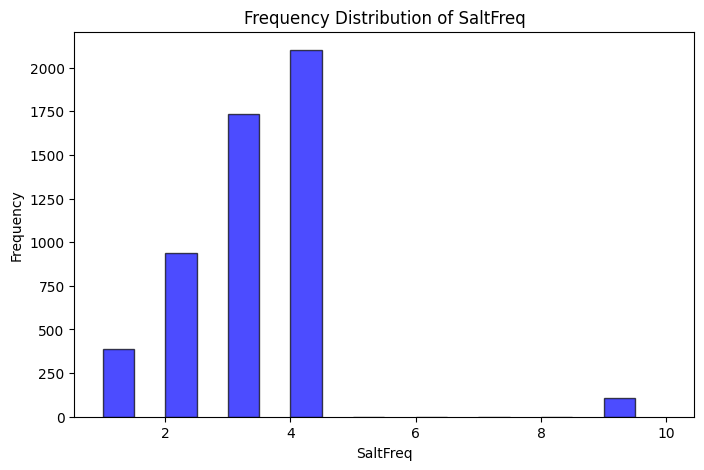

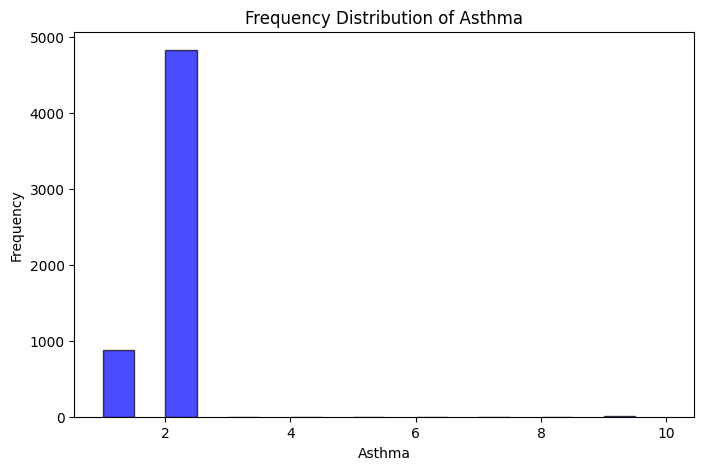

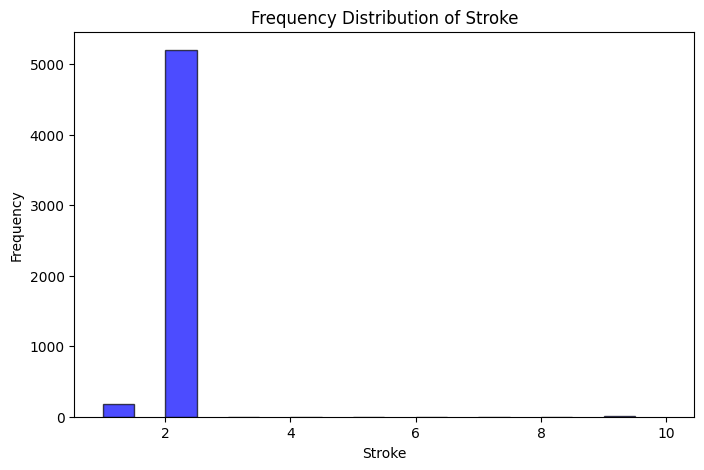

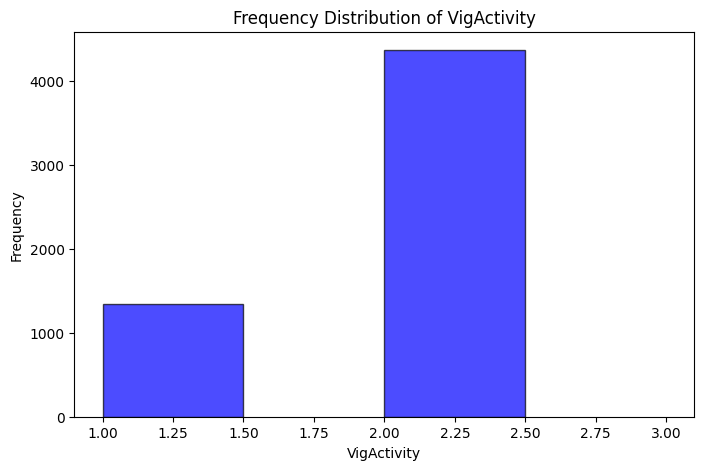

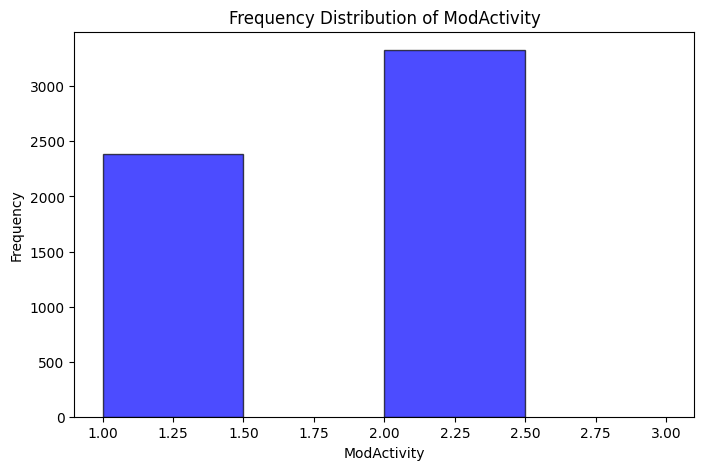

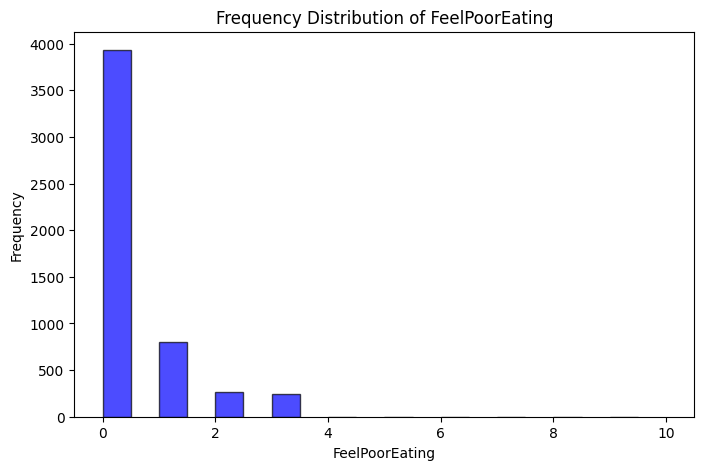

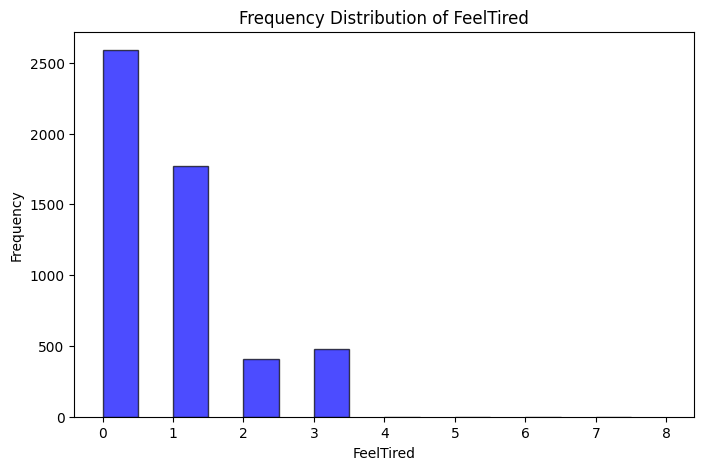

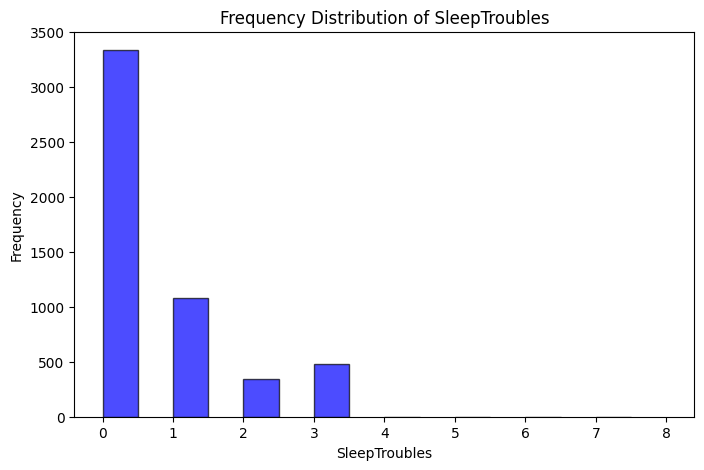

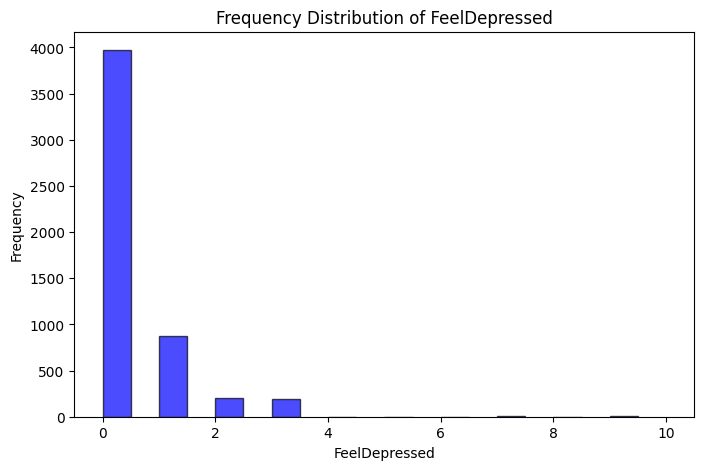

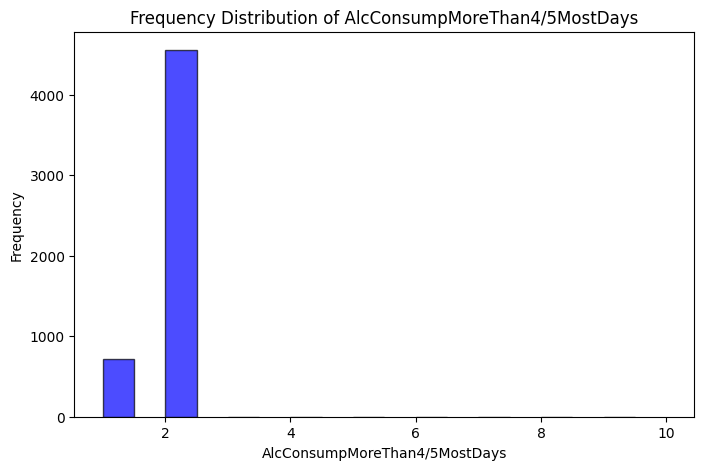

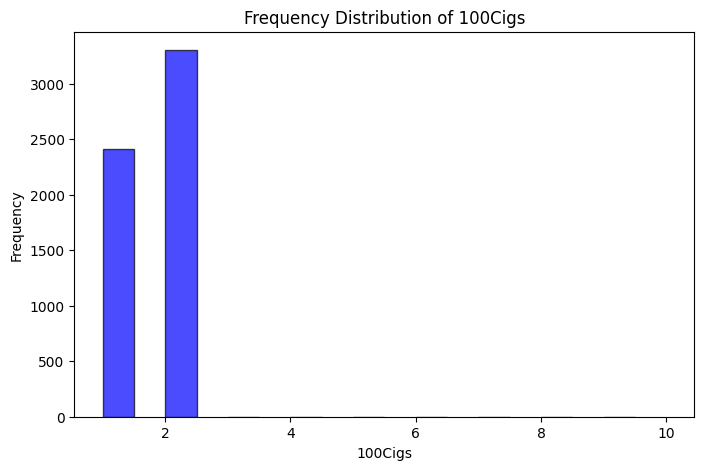

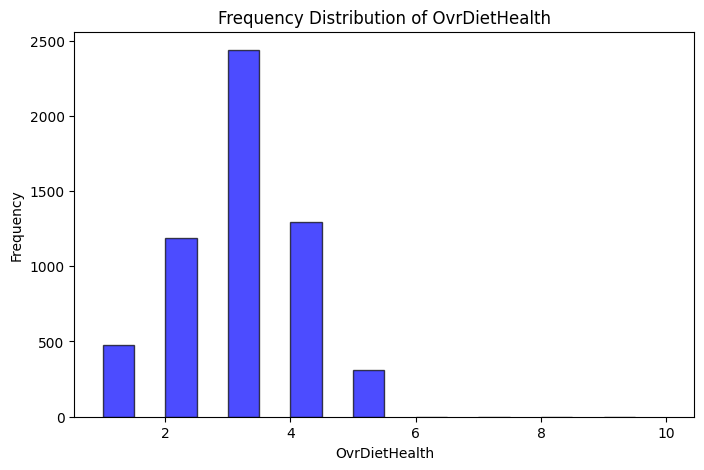

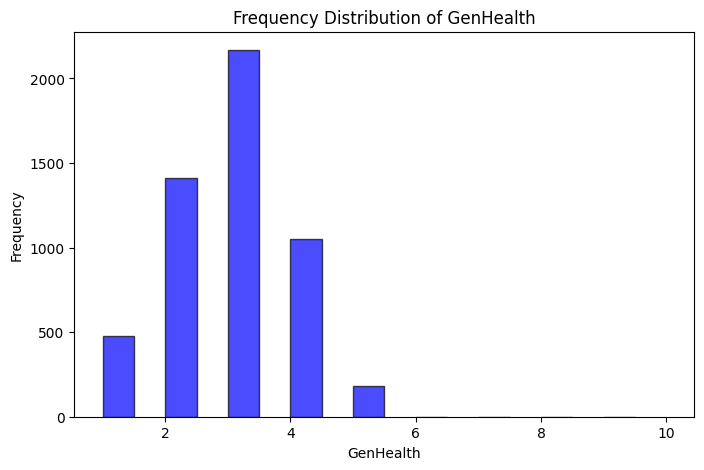

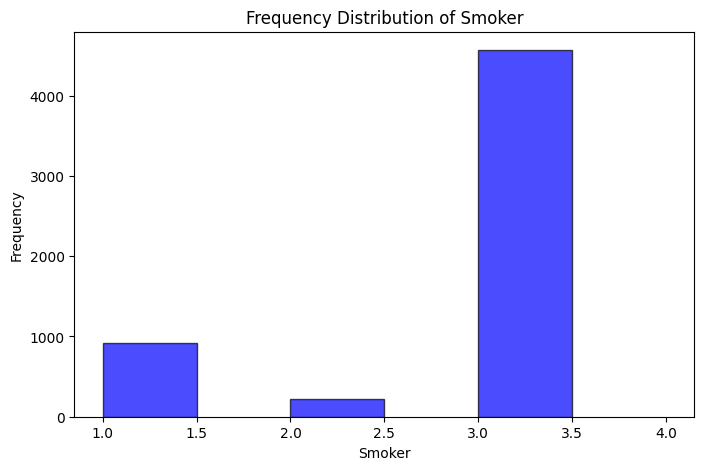

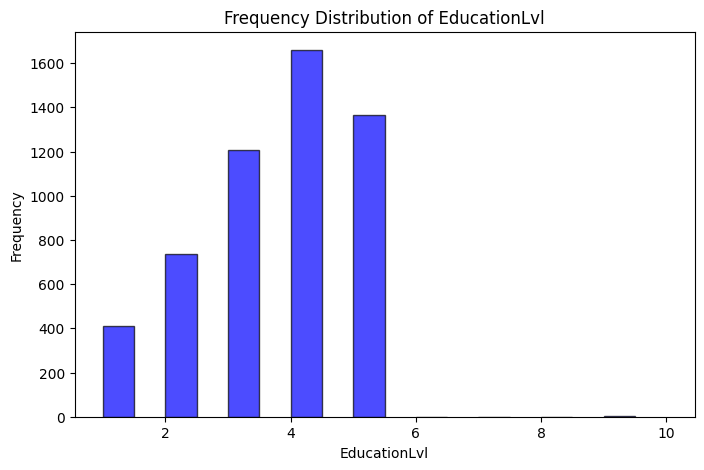

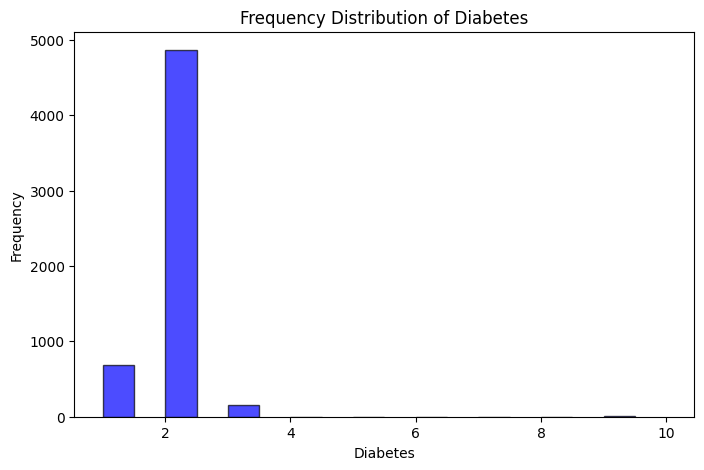

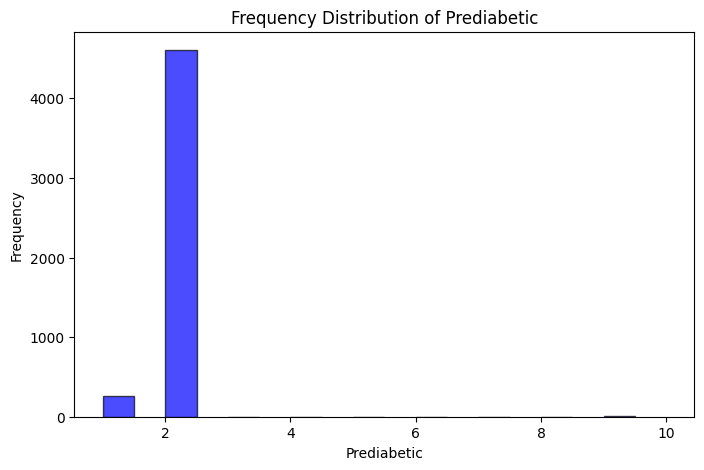

In [4222]:
feature_seventy_seven = ['SleepDuringWork']
plot_feature_distribution(df, features_seven, 77)

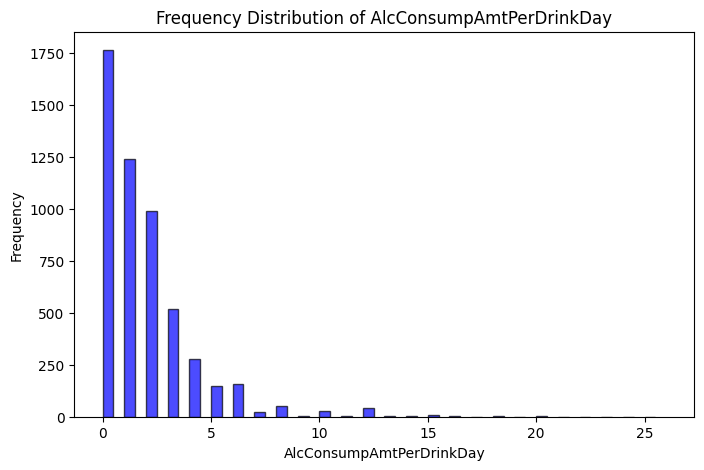

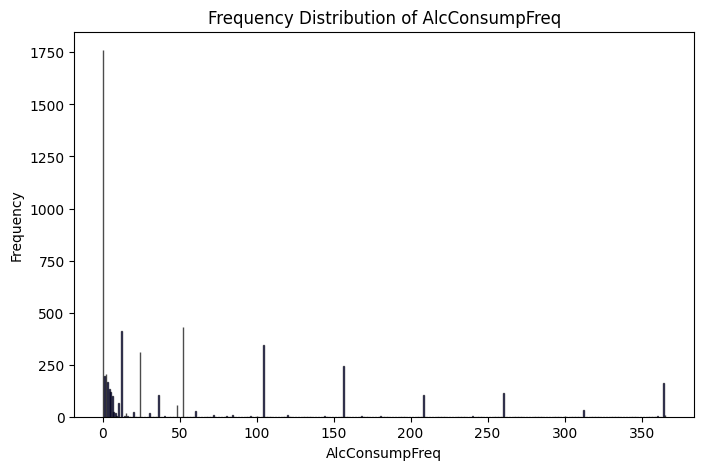

In [4223]:
feature_seven_hundred = ['AlcConsumpAmtPerDrinkDay', 'AlcConsumpFreq']
plot_feature_distribution(df, feature_seven_hundred, 777)

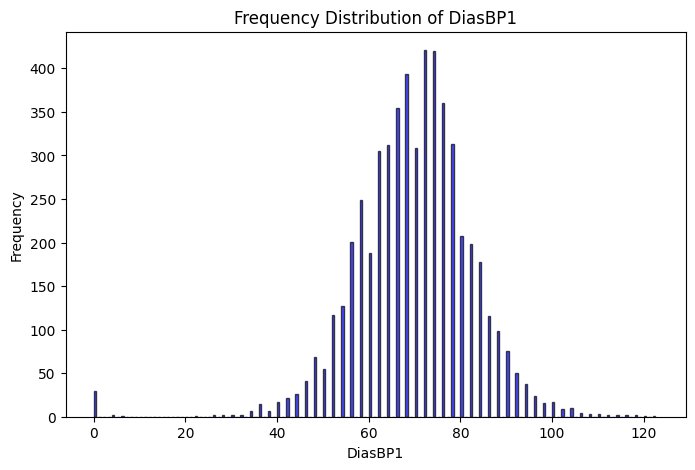

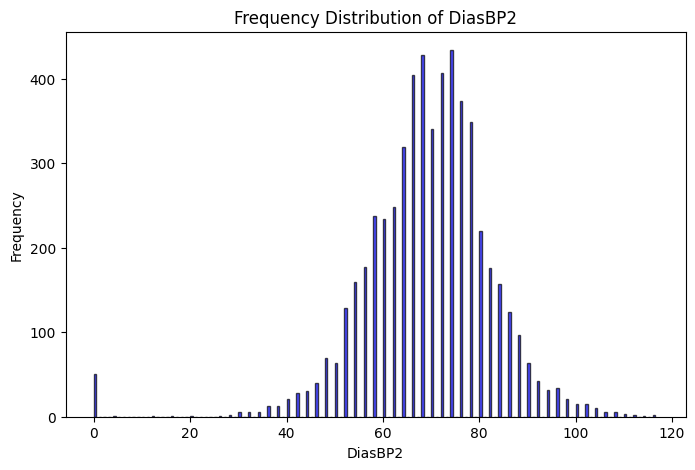

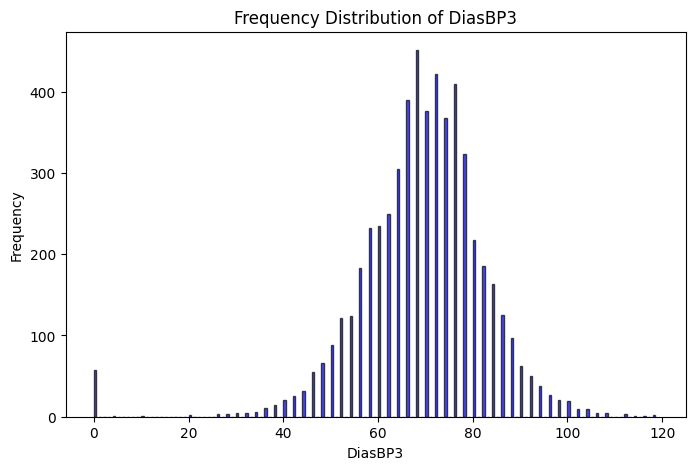

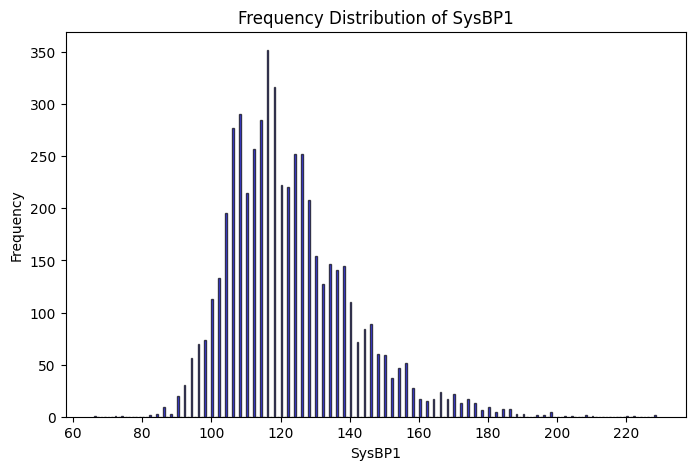

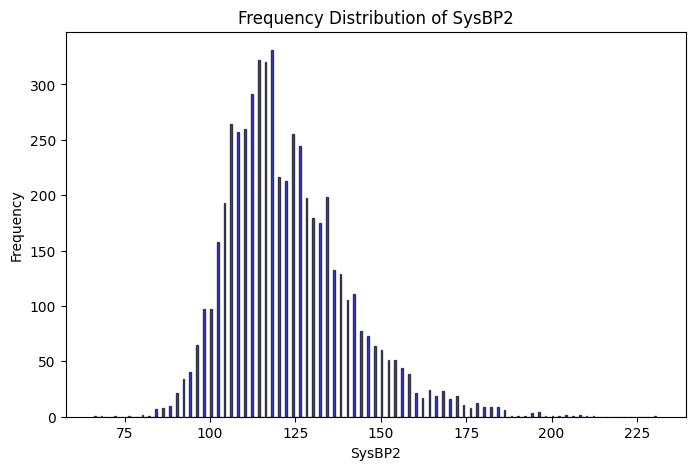

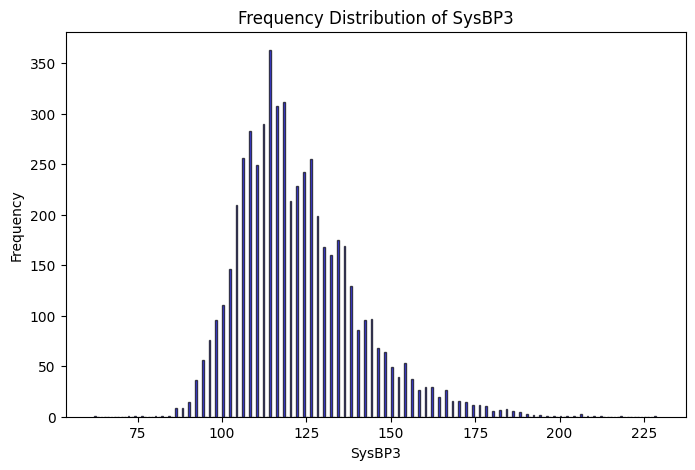

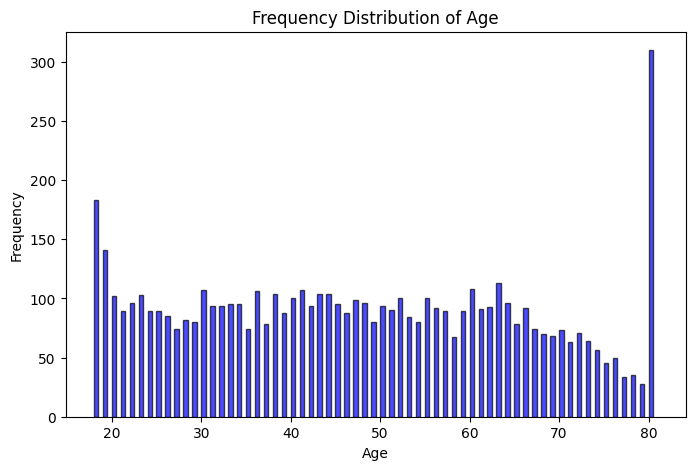

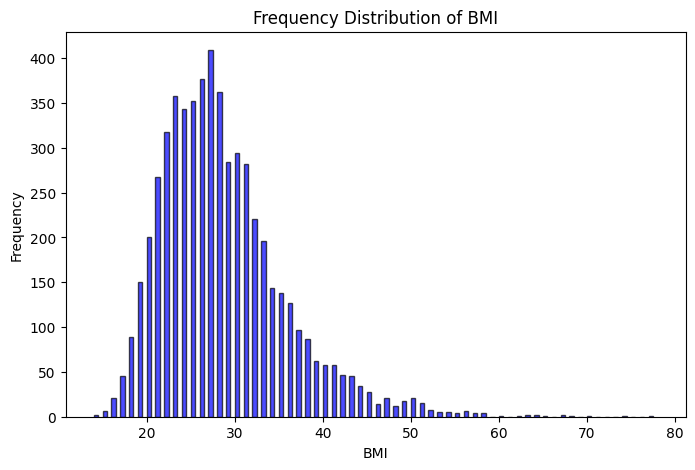

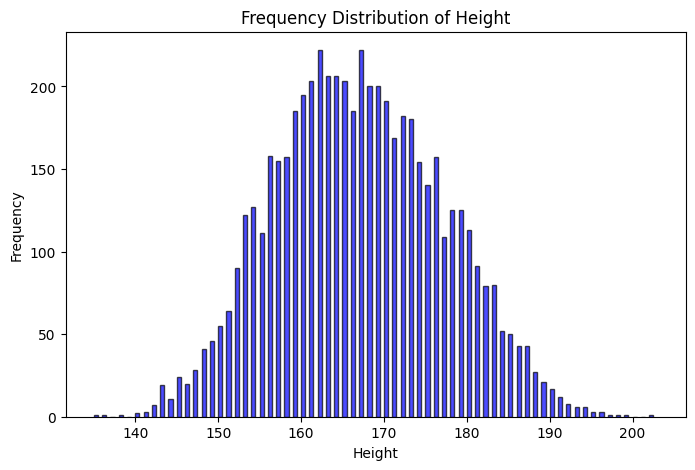

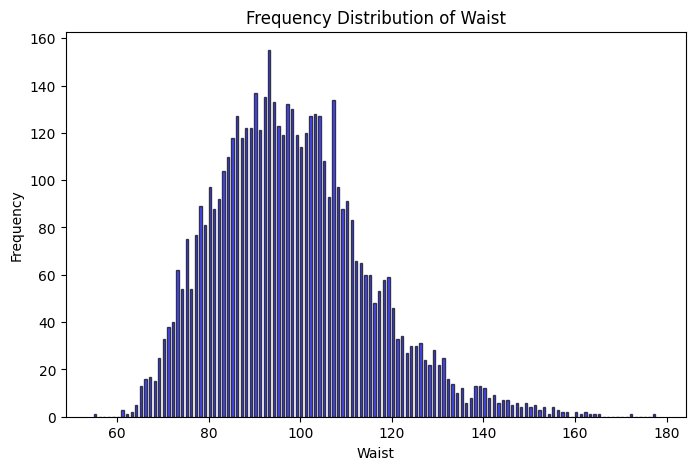

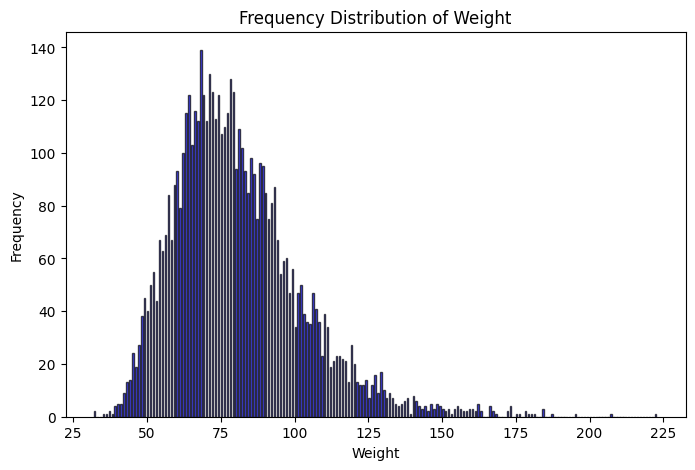

In [4224]:
other_features = ['DiasBP1','DiasBP2','DiasBP3','SysBP1','SysBP2','SysBP3','Age', 'BMI','Height','Waist','Weight']
plot_feature_distribution(df, other_features, 1000000)

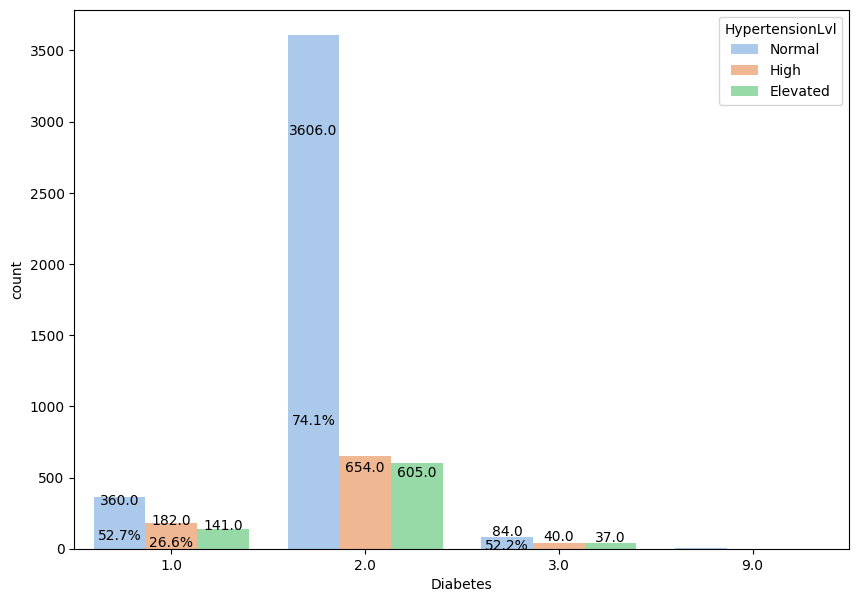

In [4225]:
plot_bivariate('Diabetes', 'HypertensionLvl')

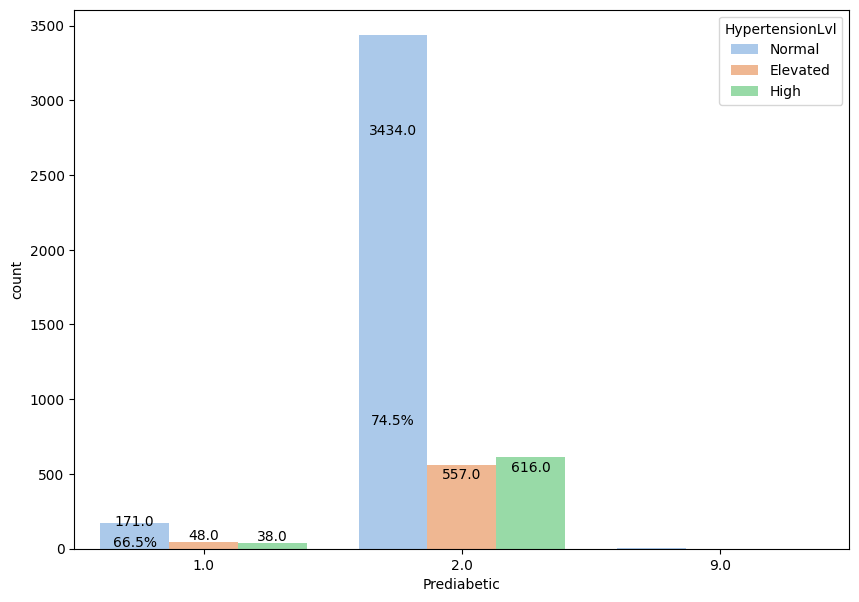

In [4226]:
plot_bivariate('Prediabetic', 'HypertensionLvl')

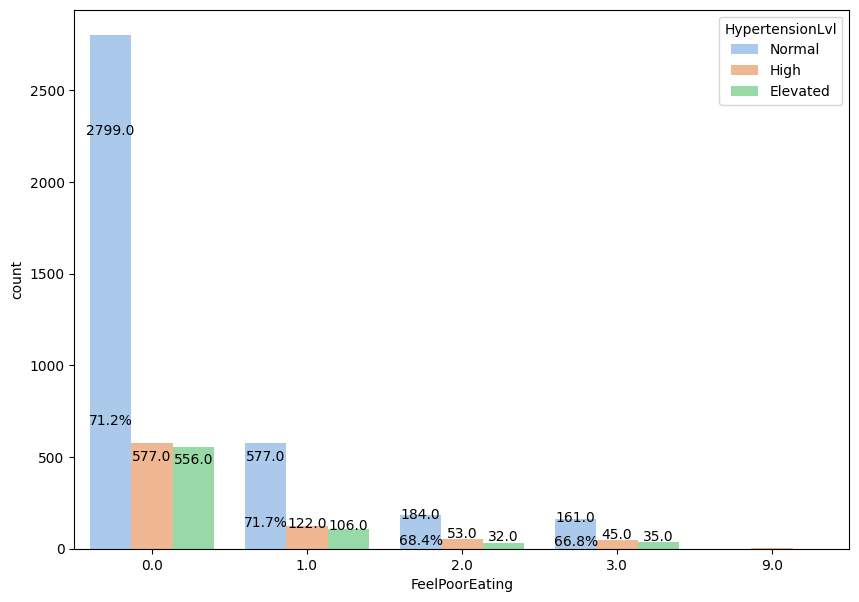

In [4227]:
#'FeelPoorEating', 'FeelTired','SleepTroubles', 'FeelDepressed', 'AlcConsumpMoreThan4/5MostDays', 'SleepDuringWork'

plot_bivariate('FeelPoorEating', 'HypertensionLvl')


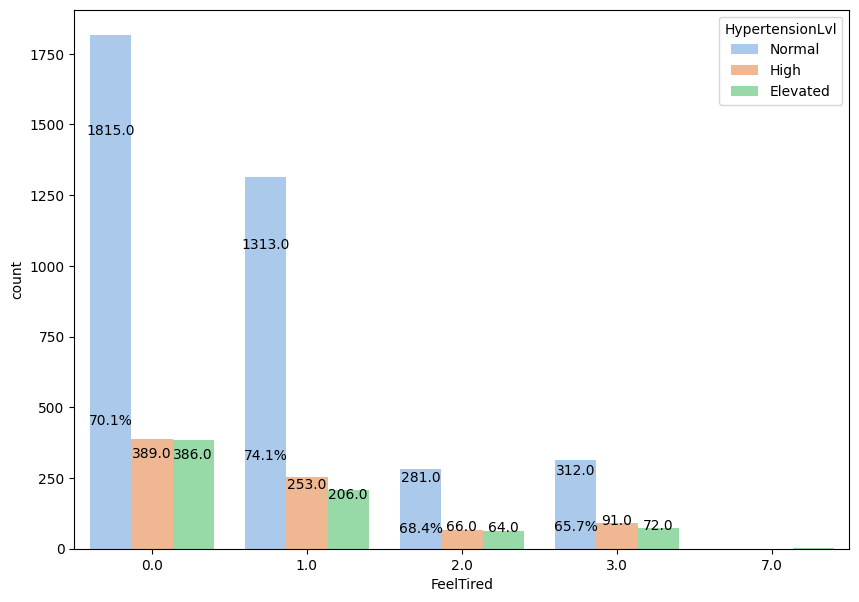

In [4228]:
plot_bivariate('FeelTired', 'HypertensionLvl')

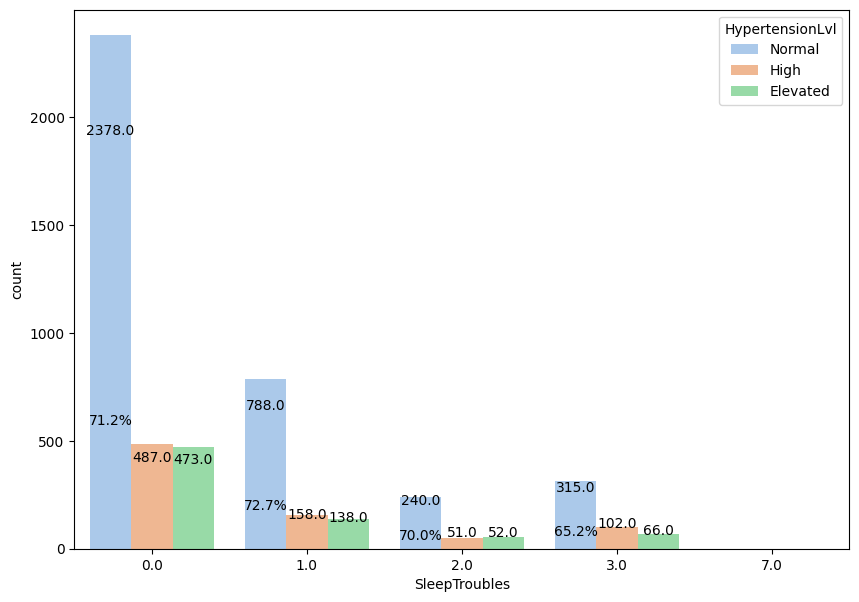

In [4229]:
plot_bivariate('SleepTroubles', 'HypertensionLvl')

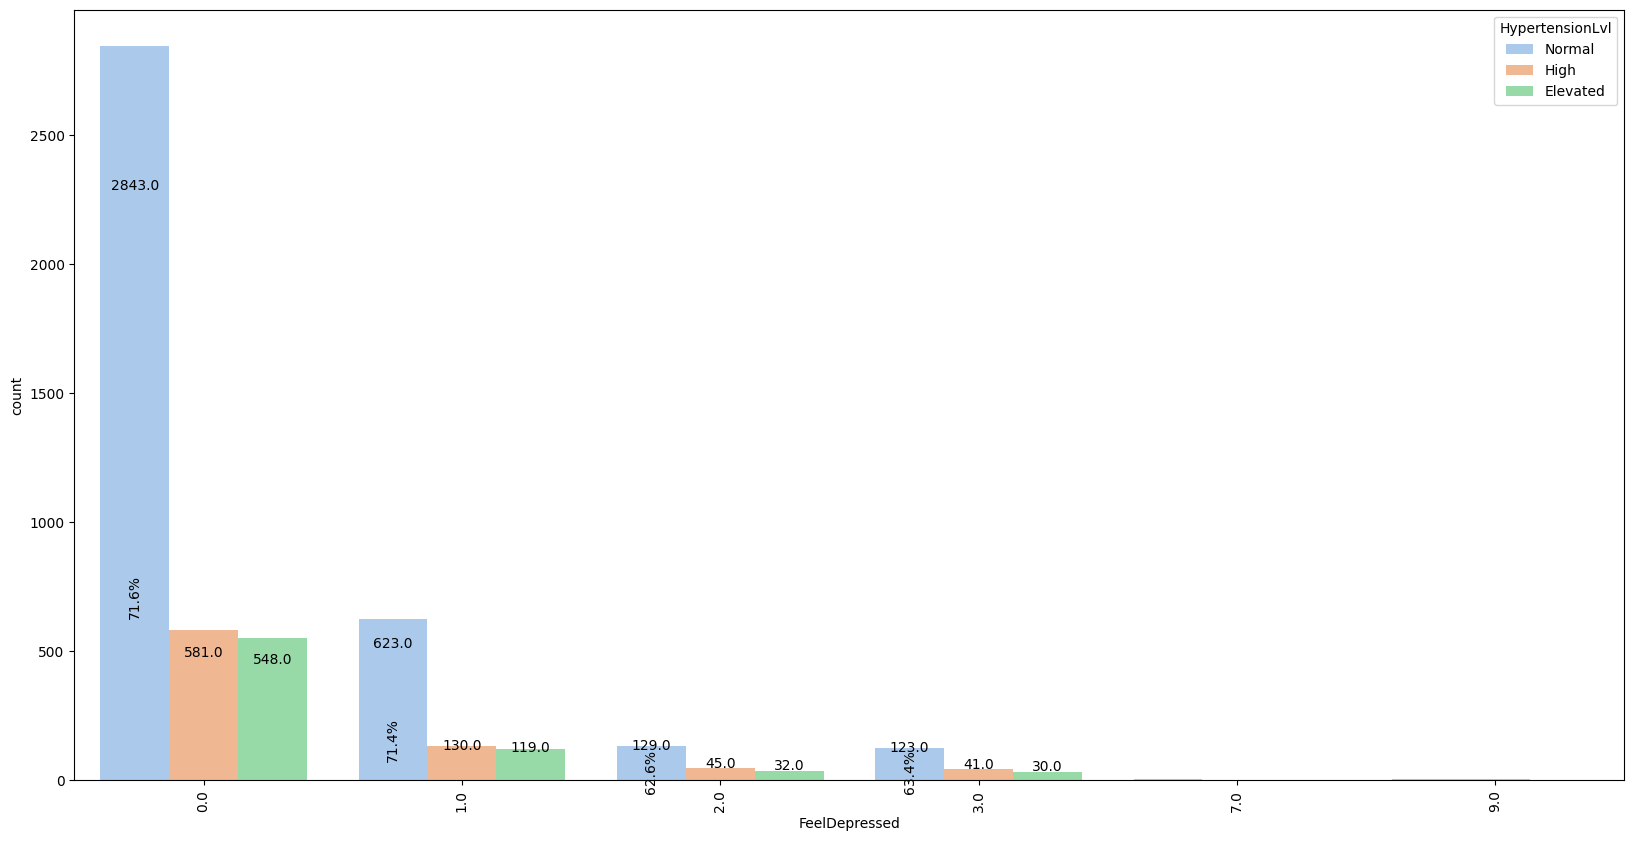

In [4230]:
plot_bivariate('FeelDepressed', 'HypertensionLvl')

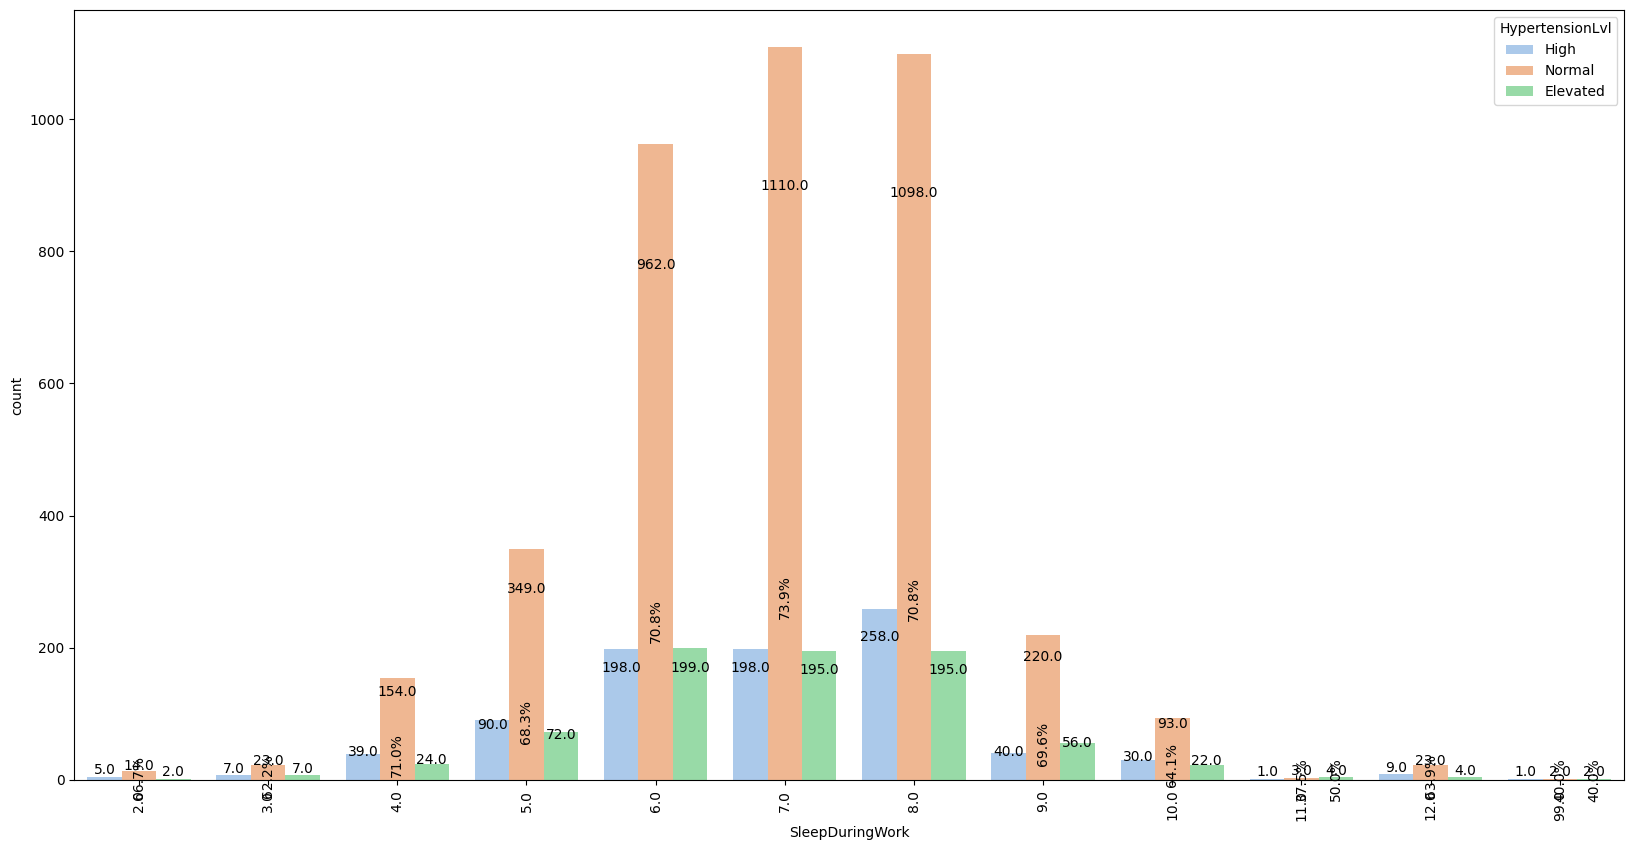

In [4231]:

plot_bivariate('SleepDuringWork', 'HypertensionLvl')

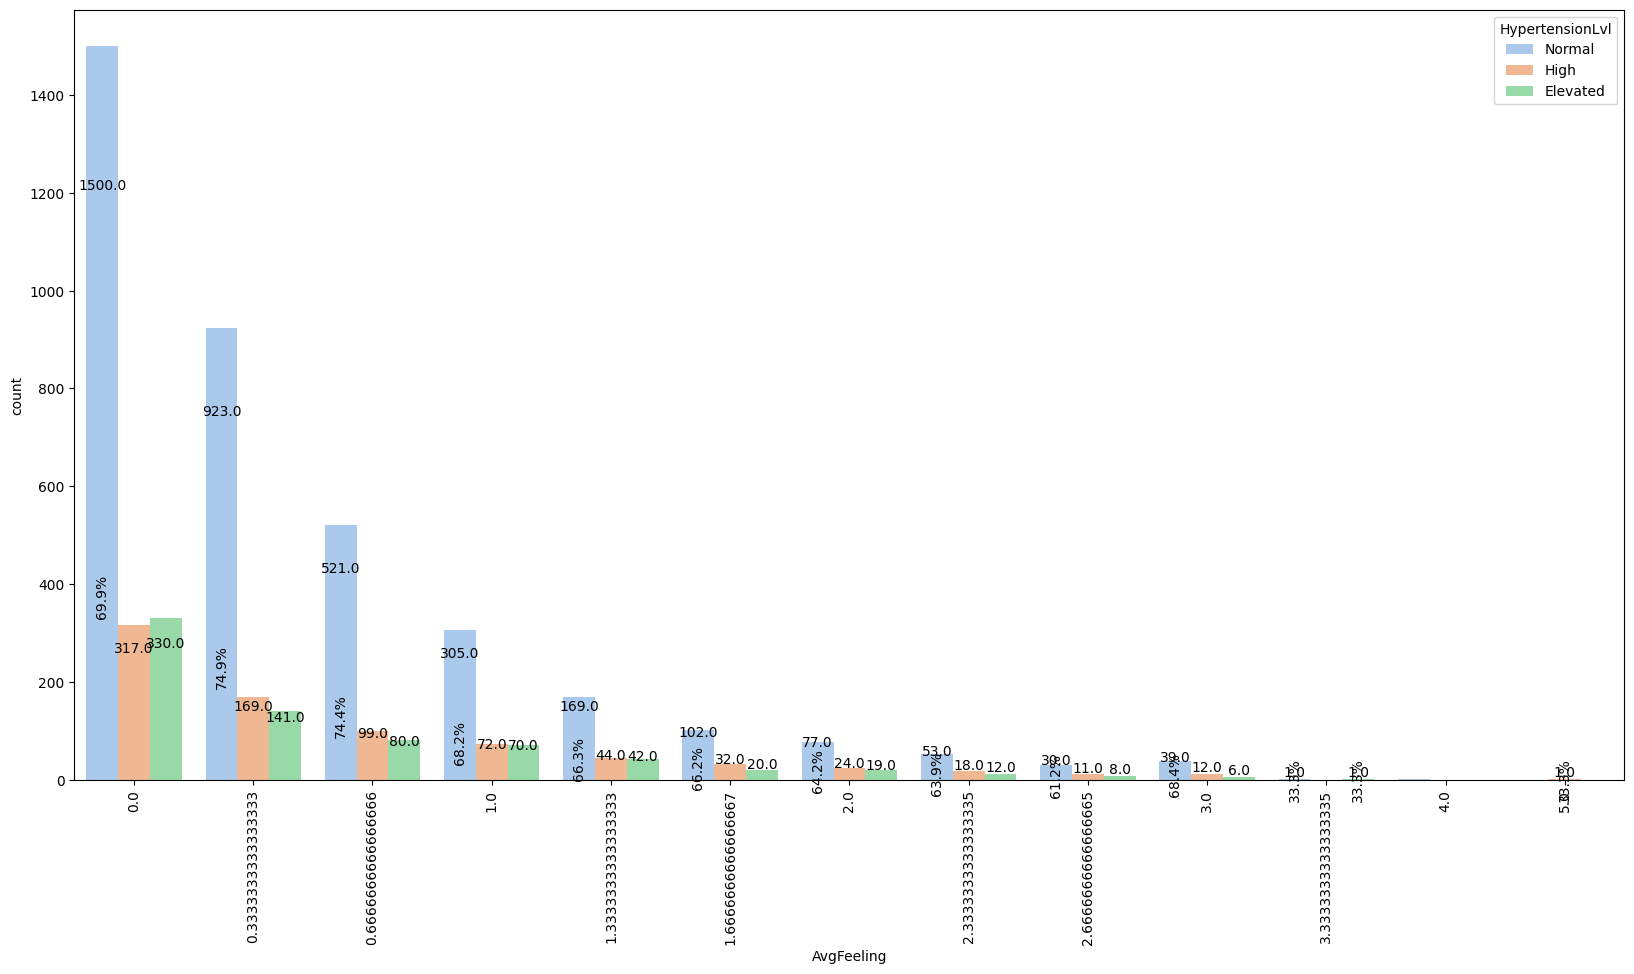

In [4232]:
#'FeelPoorEating', 'FeelTired','SleepTroubles', 'FeelDepressed', 'AlcConsumpMoreThan4/5MostDays', 'SleepDuringWork'
df['AvgFeeling'] = (df['FeelTired'] + df['FeelPoorEating'] + df['FeelDepressed'])/3
plot_bivariate('AvgFeeling', 'HypertensionLvl')

# TODO
Prediabetes and Diabetes should be joined or considered together if prediabetes is used. 

### Model Building

In [4233]:
# Print the count of null values for each column
# Drop columns with more than 2000 null values
df = df.dropna(thresh=len(df) - 2000, axis=1)

# Drop specific columns
df = df.drop(columns=['ID', 'UnitAlc', 'ALQ101', 'Prediabetic', 'DiasBP1', 'DiasBP2', 'DiasBP3', 'SysBP1', 
                      'SysBP2', 'SysBP3', 'AvgDiasBP', 'AlcConsumpFreqBinned', 'AlcConsump/YrBinned', 
                      'yearsSmokedBinned', 'lifetimeCigarettesBinned'])
null_values = df.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
Gender                             0
Age                                0
EducationLvl                     324
BMI                               61
Height                            52
Waist                            278
Weight                            49
Cholesterol                        0
Diet                             442
SaltFreq                         442
Asthma                             0
Stroke                           324
Diabetes                           0
VigActivity                        0
ModActivity                        0
FeelPoorEating                   463
FeelTired                        463
SleepTroubles                    463
FeelDepressed                    462
AlcConsumpMoreThan4/5MostDays    443
AlcConsumpFreq                   445
AlcConsumpAmtPerDrinkDay         444
100Cigs                            0
Smoker                             0
OvrDietHealth                      0
GenHealth                        417
SleepDurin

In [4234]:
# Print the number of rows without null values
num_rows_without_nulls = df.dropna().shape[0]
print(f"Number of rows without null values: {num_rows_without_nulls}")

Number of rows without null values: 4582


In [4235]:
df = df.dropna()

null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Gender                           0
Age                              0
EducationLvl                     0
BMI                              0
Height                           0
Waist                            0
Weight                           0
Cholesterol                      0
Diet                             0
SaltFreq                         0
Asthma                           0
Stroke                           0
Diabetes                         0
VigActivity                      0
ModActivity                      0
FeelPoorEating                   0
FeelTired                        0
SleepTroubles                    0
FeelDepressed                    0
AlcConsumpMoreThan4/5MostDays    0
AlcConsumpFreq                   0
AlcConsumpAmtPerDrinkDay         0
100Cigs                          0
Smoker                           0
OvrDietHealth                    0
GenHealth                        0
SleepDuringWork                  0
AvgSysBP                   

## Encoding


In [4236]:
for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for '{column}': {unique_values}\n")

Unique values for 'Gender': [1 2]

Unique values for 'Age': [69 54 72 56 61 65 26 76 33 32 38 50 28 35 29 58 57 20 37 75 43 60 55 62
 36 80 31 23 63 71 67 44 70 59 25 24 30 73 45 51 64 77 78 66 47 48 53 46
 21 39 68 52 34 42 27 49 40 22 41 79 74]

Unique values for 'EducationLvl': [3. 4. 5. 2. 1. 9.]

Unique values for 'BMI': [26.7 28.6 28.9 41.7 35.7 26.5 22.  20.3 34.4 22.8 35.9 23.6 30.1 26.2
 31.  31.2 38.3 31.8 36.8 34.9 24.2 38.9 39.1 21.6 26.  24.  32.7 27.3
 24.6 26.3 28.3 31.7 30.5 24.8 30.3 22.1 37.8 25.8 29.2 27.7 28.  46.1
 24.7 21.  33.  29.1 32.3 34.8 27.  19.3 21.5 25.3 37.6 36.4 33.7 33.6
 21.4 23.8 35.2 26.8 22.5 46.2 26.1 30.8 32.2 25.9 26.4 34.6 32.5 40.9
 33.4 19.2 36.2 32.  44.5 27.5 19.1 25.6 37.5 21.3 39.7 22.2 36.  19.
 40.3 23.4 52.3 18.1 24.1 30.2 23.2 24.9 28.2 29.9 64.7 54.2 23.  27.8
 33.5 26.9 25.  21.7 27.2 34.5 18.5 35.4 30.4 29.6 26.6 31.5 22.6 34.7
 44.2 20.9 50.9 25.4 41.6 36.5 39.9 30.7 42.3 22.9 32.4 31.1 28.7 30.9
 29.7 39.2 23.9 29.  31.9 29.5 24.

In [4237]:
def encode_yes_no_features(df, feature_names):
    for feature_name in feature_names:
        # Apply the conditions to each specified feature
        df[feature_name] = df[feature_name].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

In [4238]:
yes_no_features = ['Gender', 'Asthma', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThan4/5MostDays', '100Cigs', 'Cholesterol', 'Diet']
encode_yes_no_features(df, yes_no_features)

In [4239]:
new_column_names = {
    'Gender': 'Male'
}

df.rename(columns=new_column_names, inplace=True)

In [4240]:
df.head()

,Male,Age,EducationLvl,BMI,Height,Waist,Weight,Cholesterol,Diet,SaltFreq,...,GenHealth,SleepDuringWork,AvgSysBP,HypertensionLvl,yearsSmoked,lifetimeCigarettes,AlcConsump/Yr,ActivityLvl,WeightedActivity,AvgFeeling
0,1,69,3.0,26.7,171.3,100.0,78.3,1.0,0.0,4.0,...,2.0,7.0,112.666667,Normal,49.0,35770.0,1.0,0.0,0.0,0.000000
1,1,54,3.0,28.6,176.8,107.6,89.5,1.0,0.0,3.0,...,4.0,9.0,157.333333,High,54.0,657.0,1456.0,0.0,0.0,0.000000
2,1,72,4.0,28.9,175.3,109.2,88.9,1.0,1.0,2.0,...,3.0,8.0,142.000000,High,6.0,6570.0,0.0,0.5,1.0,0.000000
5,1,56,4.0,41.7,158.7,123.1,105.0,1.0,0.0,3.0,...,5.0,5.0,157.333333,High,22.0,40150.0,5.0,0.0,0.0,3.000000
7,0,61,5.0,35.7,161.8,110.8,93.4,0.0,0.0,1.0,...,3.0,9.0,122.666667,Normal,0.0,0.0,2.0,0.0,0.0,0.666667


In [4241]:
df['Diabetes'] = df['Diabetes'].replace({1: 2, 2: 0, 3: 1})

In [4242]:
def minus_one_from_feature_rating(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = df[feature_name] -1

In [4243]:
features_to_minus_one = ['SaltFreq', 'OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
minus_one_from_feature_rating(df, features_to_minus_one)

In [4244]:
df.head()

,Male,Age,EducationLvl,BMI,Height,Waist,Weight,Cholesterol,Diet,SaltFreq,...,GenHealth,SleepDuringWork,AvgSysBP,HypertensionLvl,yearsSmoked,lifetimeCigarettes,AlcConsump/Yr,ActivityLvl,WeightedActivity,AvgFeeling
0,1,69,2.0,26.7,171.3,100.0,78.3,1.0,0.0,3.0,...,1.0,7.0,112.666667,Normal,49.0,35770.0,1.0,0.0,0.0,0.000000
1,1,54,2.0,28.6,176.8,107.6,89.5,1.0,0.0,2.0,...,3.0,9.0,157.333333,High,54.0,657.0,1456.0,0.0,0.0,0.000000
2,1,72,3.0,28.9,175.3,109.2,88.9,1.0,1.0,1.0,...,2.0,8.0,142.000000,High,6.0,6570.0,0.0,0.5,1.0,0.000000
5,1,56,3.0,41.7,158.7,123.1,105.0,1.0,0.0,2.0,...,4.0,5.0,157.333333,High,22.0,40150.0,5.0,0.0,0.0,3.000000
7,0,61,4.0,35.7,161.8,110.8,93.4,0.0,0.0,0.0,...,2.0,9.0,122.666667,Normal,0.0,0.0,2.0,0.0,0.0,0.666667


In [4245]:
from sklearn.preprocessing import MinMaxScaler
def min_max_normalise(df, features, threshold):
    scaler = MinMaxScaler()
    
    # Iterate over each feature to apply threshold logic
    for feature in features:
        df.loc[df[feature] > threshold, feature] = np.nan
        
    df[features] = scaler.fit_transform(df[features])
    
    return df

In [4246]:
features_to_scale = ['FeelPoorEating','FeelTired','SleepTroubles','FeelDepressed', 'SaltFreq','OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl', 'Diabetes', 'WeightedActivity', 'AvgFeeling']
min_max_normalise(df, features_to_scale, 6)

,Male,Age,EducationLvl,BMI,Height,Waist,Weight,Cholesterol,Diet,SaltFreq,...,GenHealth,SleepDuringWork,AvgSysBP,HypertensionLvl,yearsSmoked,lifetimeCigarettes,AlcConsump/Yr,ActivityLvl,WeightedActivity,AvgFeeling
0,1,69,0.50,26.7,171.3,100.0,78.3,1.0,0.0,1.000000,...,0.25,7.0,112.666667,Normal,49.0,35770.0,1.0,0.0,0.000000,0.000000
1,1,54,0.50,28.6,176.8,107.6,89.5,1.0,0.0,0.666667,...,0.75,9.0,157.333333,High,54.0,657.0,1456.0,0.0,0.000000,0.000000
2,1,72,0.75,28.9,175.3,109.2,88.9,1.0,1.0,0.333333,...,0.50,8.0,142.000000,High,6.0,6570.0,0.0,0.5,0.333333,0.000000
5,1,56,0.75,41.7,158.7,123.1,105.0,1.0,0.0,0.666667,...,1.00,5.0,157.333333,High,22.0,40150.0,5.0,0.0,0.000000,0.600000
7,0,61,1.00,35.7,161.8,110.8,93.4,0.0,0.0,0.000000,...,0.50,9.0,122.666667,Normal,0.0,0.0,2.0,0.0,0.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,1,58,0.00,26.3,170.4,97.5,76.3,0.0,0.0,0.333333,...,0.25,6.0,118.000000,Normal,42.0,459900.0,0.0,0.0,0.000000,0.266667
9802,1,52,1.00,25.6,176.2,92.7,79.5,1.0,0.0,0.333333,...,0.25,8.0,109.333333,Normal,0.0,0.0,36.0,1.0,1.000000,0.000000
9804,1,61,0.25,33.1,173.5,115.0,99.5,0.0,0.0,1.000000,...,0.75,6.0,140.000000,High,0.0,0.0,6.0,0.5,0.333333,0.000000
9805,1,80,0.50,24.9,176.0,92.3,77.1,1.0,0.0,0.000000,...,0.25,9.0,166.666667,High,32.0,233600.0,0.0,0.5,0.333333,0.066667


In [4247]:
for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        print(f"Feature '{column}': Max = {max_value}, Min = {min_value}\n")

Feature 'Male': Max = 1, Min = 0

Feature 'Age': Max = 80, Min = 20

Feature 'EducationLvl': Max = 1.0, Min = 0.0

Feature 'BMI': Max = 70.1, Min = 14.1

Feature 'Height': Max = 202.6, Min = 135.4

Feature 'Waist': Max = 172.5, Min = 55.5

Feature 'Weight': Max = 195.4, Min = 32.3

Feature 'Cholesterol': Max = 1.0, Min = 0.0

Feature 'Diet': Max = 1.0, Min = 0.0

Feature 'SaltFreq': Max = 1.0, Min = 0.0

Feature 'Asthma': Max = 1.0, Min = 0.0

Feature 'Stroke': Max = 1.0, Min = 0.0

Feature 'Diabetes': Max = 1.0, Min = 0.0

Feature 'VigActivity': Max = 1, Min = 0

Feature 'ModActivity': Max = 1, Min = 0

Feature 'FeelPoorEating': Max = 1.0, Min = 0.0

Feature 'FeelTired': Max = 1.0, Min = 0.0

Feature 'SleepTroubles': Max = 1.0, Min = 0.0

Feature 'FeelDepressed': Max = 1.0, Min = 0.0

Feature 'AlcConsumpMoreThan4/5MostDays': Max = 1, Min = 0

Feature 'AlcConsumpFreq': Max = 365.0, Min = 0.0

Feature 'AlcConsumpAmtPerDrinkDay': Max = 25.0, Min = 0.0

Feature '100Cigs': Max = 1.0, Min =

Must fix negatives for lifetimecigs, yearsSmoked

In [4248]:
#Temp Fix
df['lifetimeCigarettes'] = df['lifetimeCigarettes'].apply(lambda x: 0 if x < 0 else x)
df['yearsSmoked'] = df['yearsSmoked'].apply(lambda x: 0 if x < 0 else x)

In [4249]:
for column in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        print(f"Feature '{column}': Max = {max_value}, Min = {min_value}\n")

Feature 'Male': Max = 1, Min = 0

Feature 'Age': Max = 80, Min = 20

Feature 'EducationLvl': Max = 1.0, Min = 0.0

Feature 'BMI': Max = 70.1, Min = 14.1

Feature 'Height': Max = 202.6, Min = 135.4

Feature 'Waist': Max = 172.5, Min = 55.5

Feature 'Weight': Max = 195.4, Min = 32.3

Feature 'Cholesterol': Max = 1.0, Min = 0.0

Feature 'Diet': Max = 1.0, Min = 0.0

Feature 'SaltFreq': Max = 1.0, Min = 0.0

Feature 'Asthma': Max = 1.0, Min = 0.0

Feature 'Stroke': Max = 1.0, Min = 0.0

Feature 'Diabetes': Max = 1.0, Min = 0.0

Feature 'VigActivity': Max = 1, Min = 0

Feature 'ModActivity': Max = 1, Min = 0

Feature 'FeelPoorEating': Max = 1.0, Min = 0.0

Feature 'FeelTired': Max = 1.0, Min = 0.0

Feature 'SleepTroubles': Max = 1.0, Min = 0.0

Feature 'FeelDepressed': Max = 1.0, Min = 0.0

Feature 'AlcConsumpMoreThan4/5MostDays': Max = 1, Min = 0

Feature 'AlcConsumpFreq': Max = 365.0, Min = 0.0

Feature 'AlcConsumpAmtPerDrinkDay': Max = 25.0, Min = 0.0

Feature '100Cigs': Max = 1.0, Min =

In [4250]:
features_to_normalise = ['Age', 'BMI', 'Height', 'Waist', 'Weight', 'AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay', 'AlcConsump/Yr', 'lifetimeCigarettes', 'yearsSmoked']
min_max_normalise(df, features_to_normalise, 100000000000000)

,Male,Age,EducationLvl,BMI,Height,Waist,Weight,Cholesterol,Diet,SaltFreq,...,GenHealth,SleepDuringWork,AvgSysBP,HypertensionLvl,yearsSmoked,lifetimeCigarettes,AlcConsump/Yr,ActivityLvl,WeightedActivity,AvgFeeling
0,1,0.816667,0.50,0.225000,0.534226,0.380342,0.282036,1.0,0.0,1.000000,...,0.25,7.0,112.666667,Normal,0.690141,0.022924,0.000153,0.0,0.000000,0.000000
1,1,0.566667,0.50,0.258929,0.616071,0.445299,0.350705,1.0,0.0,0.666667,...,0.75,9.0,157.333333,High,0.760563,0.000421,0.222222,0.0,0.000000,0.000000
2,1,0.866667,0.75,0.264286,0.593750,0.458974,0.347026,1.0,1.0,0.333333,...,0.50,8.0,142.000000,High,0.084507,0.004211,0.000000,0.5,0.333333,0.000000
5,1,0.600000,0.75,0.492857,0.346726,0.577778,0.445739,1.0,0.0,0.666667,...,1.00,5.0,157.333333,High,0.309859,0.025731,0.000763,0.0,0.000000,0.600000
7,0,0.683333,1.00,0.385714,0.392857,0.472650,0.374617,0.0,0.0,0.000000,...,0.50,9.0,122.666667,Normal,0.000000,0.000000,0.000305,0.0,0.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,1,0.633333,0.00,0.217857,0.520833,0.358974,0.269773,0.0,0.0,0.333333,...,0.25,6.0,118.000000,Normal,0.591549,0.294737,0.000000,0.0,0.000000,0.266667
9802,1,0.533333,1.00,0.205357,0.607143,0.317949,0.289393,1.0,0.0,0.333333,...,0.25,8.0,109.333333,Normal,0.000000,0.000000,0.005495,1.0,1.000000,0.000000
9804,1,0.683333,0.25,0.339286,0.566964,0.508547,0.412017,0.0,0.0,1.000000,...,0.75,6.0,140.000000,High,0.000000,0.000000,0.000916,0.5,0.333333,0.000000
9805,1,1.000000,0.50,0.192857,0.604167,0.314530,0.274678,1.0,0.0,0.000000,...,0.25,9.0,166.666667,High,0.450704,0.149708,0.000000,0.5,0.333333,0.066667


In [4251]:
def print_unique_values(df, features):

    for feature in features:
        if feature in df.columns:
            unique_values = df[feature].unique()
            print(f"Unique values for '{feature}': {unique_values}")
        else:
            print(f"Feature '{feature}' not found in the df.")

In [4252]:
print_unique_values(df, ['OvrDietHealth', 'GenHealth', 'Smoker', 'FeelPoorEating','FeelTired','SleepTroubles','FeelDepressed', 'SaltFreq','OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl', 'Diabetes','Gender', 'Asthma', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThan4/5MostDays', '100Cigs', 'Cholesterol', 'Diet', 'Prediabetic'])

Unique values for 'OvrDietHealth': [0.25 0.5  1.   0.75 0.    nan]
Unique values for 'GenHealth': [0.25 0.75 0.5  1.   0.  ]
Unique values for 'Smoker': [1.  0.5 0. ]
Unique values for 'FeelPoorEating': [0.         1.         0.33333333 0.66666667        nan]
Unique values for 'FeelTired': [0.         1.         0.33333333 0.66666667        nan]
Unique values for 'SleepTroubles': [0.         1.         0.33333333 0.66666667        nan]
Unique values for 'FeelDepressed': [0.         1.         0.33333333 0.66666667        nan]
Unique values for 'SaltFreq': [1.         0.66666667 0.33333333 0.                nan]
Unique values for 'OvrDietHealth': [0.25 0.5  1.   0.75 0.    nan]
Unique values for 'GenHealth': [0.25 0.75 0.5  1.   0.  ]
Unique values for 'Smoker': [1.  0.5 0. ]
Unique values for 'EducationLvl': [0.5  0.75 1.   0.25 0.    nan]
Unique values for 'Diabetes': [1.  0.  0.5 nan]
Feature 'Gender' not found in the df.
Unique values for 'Asthma': [ 0.  1. nan]
Unique values for 'S

### Transformations

In [4253]:
#'AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay', 'AlcConsump/Yr', 'lifetimeCigarettes'
df['BMI'] = 1 / (1 + np.exp(-20 * (df['BMI'] - 0.6)))

df['AlcConsumpFreq'] = 1 / (1 + np.exp(-8 * (df['AlcConsumpFreq'] - 0.5)))

df['AlcConsumpAmtPerDrinkDay'] = 1.01824 / (1 + np.exp(-15 * (df['AlcConsumpAmtPerDrinkDay'] - 0.5)))

df['AlcConsump/Yr'] = 1 / (1 + np.exp(-15 * (df['AlcConsump/Yr'] - 0.5)))

df['lifetimeCigarettes'] = 1 / (1 + np.exp(-15 * (df['lifetimeCigarettes'] - 0.5)))


# MODELS NEW

## Binary Classification Models

In [4254]:
df = df.dropna()

null_values = df.isnull().sum()
print("Null values in each column:")

Null values in each column:


In [4255]:
# Create the target variable
target = df['HypertensionLvl']

# Drop the HypertensionLvl column from the DataFrame
df = df.drop(columns=['HypertensionLvl', 'AvgSysBP', 'SaltFreq', 'Asthma', 'FeelPoorEating', 'FeelTired',
                      'SleepTroubles', 'FeelDepressed', 'AlcConsumpMoreThan4/5MostDays', 'SleepDuringWork'])

# Print the resulting DataFrame and the target variable to verify
print("DataFrame after dropping 'HypertensionLvl':")
print(df.head())
print("\nTarget variable 'HypertensionLvl':")
print(target.head())

DataFrame after dropping 'HypertensionLvl':
   Male       Age  EducationLvl       BMI    Height     Waist    Weight  \
0     1  0.816667          0.50  0.000553  0.534226  0.380342  0.282036   
1     1  0.566667          0.50  0.001089  0.616071  0.445299  0.350705   
2     1  0.866667          0.75  0.001212  0.593750  0.458974  0.347026   
5     1  0.600000          0.75  0.105001  0.346726  0.577778  0.445739   
7     0  0.683333          1.00  0.013577  0.392857  0.472650  0.374617   

   Cholesterol  Diet  Stroke  ...  100Cigs  Smoker  OvrDietHealth  GenHealth  \
0          1.0   0.0     1.0  ...      1.0     1.0           0.25       0.25   
1          1.0   0.0     0.0  ...      1.0     0.5           0.50       0.75   
2          1.0   1.0     0.0  ...      1.0     1.0           0.50       0.50   
5          1.0   0.0     0.0  ...      1.0     1.0           1.00       1.00   
7          0.0   0.0     0.0  ...      0.0     1.0           0.75       0.50   

   yearsSmoked  lifetime

In [4256]:
# Transform the HypertensionLvl column
target = target.apply(lambda x: 1 if x in ['Elevated', 'High'] else 0)

# Print the transformed target column to verify
print(target.head())
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)
X_train, X_test, Y_train, Y_test = train_test_split(df, target_encoded, test_size=0.35, random_state=42)

# Print the shapes of the resulting splits to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", Y_train.shape)
print("Test target shape:", Y_test.shape)

0    0
1    1
2    1
5    1
7    0
Name: HypertensionLvl, dtype: int64
Training set shape: (2899, 25)
Test set shape: (1562, 25)
Training target shape: (2899,)
Test target shape: (1562,)


### PCA

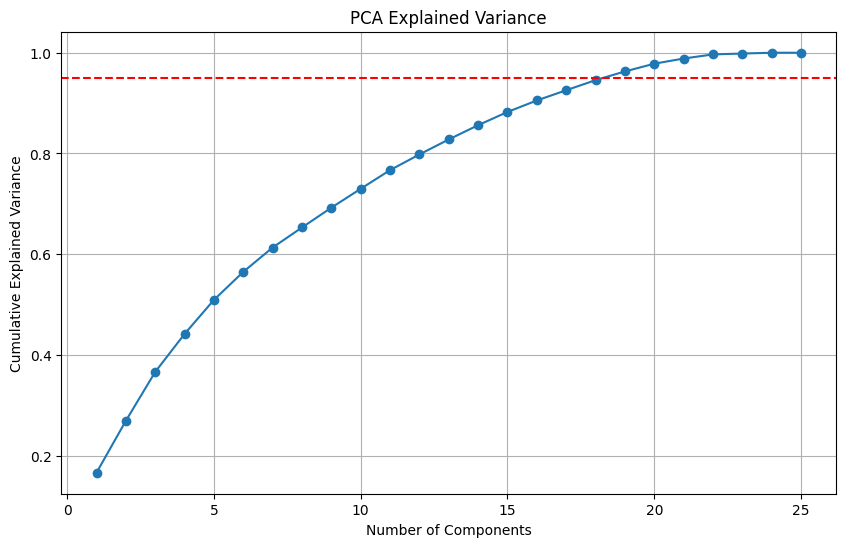

Number of components explaining 95% variance: 19

Feature Importance (Loadings):
                               PC1       PC2       PC3       PC4       PC5  \
Male                     -0.021473  0.284992  0.255528  0.115770 -0.368046   
Age                       0.166657 -0.059916 -0.016013 -0.470293 -0.264002   
EducationLvl             -0.198838  0.063878 -0.081075 -0.046068 -0.183400   
BMI                       0.144281  0.320963 -0.182493  0.057021  0.162091   
Height                   -0.046225  0.366084  0.229948  0.175347 -0.329451   
Waist                     0.239802  0.447780 -0.150490 -0.043998  0.004200   
Weight                    0.166839  0.538559 -0.096005  0.083706 -0.030003   
Cholesterol               0.113075  0.071327 -0.047789 -0.404079 -0.139200   
Diet                      0.024672  0.138895 -0.142499 -0.243344  0.065353   
Stroke                    0.087901 -0.024588  0.008864 -0.221396 -0.000308   
Diabetes                  0.163592  0.112204 -0.100561 -0.328

In [4257]:
#PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame without the target variable
# 1. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 2. Apply PCA
pca = PCA()
pca.fit(scaled_data)

# 3. Determine the number of components to keep (e.g., 95% variance explained)
explained_variance = pca.explained_variance_ratio_.cumsum()
num_components = np.argmax(explained_variance >= 0.95) + 1  # 95% variance

# Plot the explained variance to visualize component importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

print(f"Number of components explaining 95% variance: {num_components}")

# 4. Fit PCA with the optimal number of components
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(scaled_data)

# 5. Analyze the feature importance (loadings)
loadings = pca.components_.T  # Transpose to align with original features
feature_importance = pd.DataFrame(loadings, index=df.columns, 
                                  columns=[f'PC{i+1}' for i in range(num_components)])

# Display the loadings (feature importance per principal component)
print("\nFeature Importance (Loadings):")
print(feature_importance)

# Identify the most important features based on their absolute loadings
important_features = feature_importance.abs().mean(axis=1).sort_values(ascending=False)
print("\nMost Important Features Based on Mean Absolute Loadings:")
print(important_features)

### Initial Model Training and Evaluation

In [4258]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Check if the model supports predict_proba (required for AUC)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:
        print("Model does not support probability predictions; AUC cannot be calculated.")
        y_pred_proba = None
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.5f}")

    # Create a DataFrame to compare predictions with actual results
    comparison_df = pd.DataFrame({
        'Actual': Y_test,
        'Predicted': y_pred
    })

    # Add predicted probabilities if available
    if y_pred_proba is not None:
        comparison_df['Predicted_Probability'] = y_pred_proba

    # Print the comparison DataFrame
    print("\nComparison DataFrame:")
    print(comparison_df.to_string())

    # Calculate AUC score if probabilities are available
    if y_pred_proba is not None:
        auc = roc_auc_score(Y_test, y_pred_proba)
        print(f"AUC Score: {auc:.5f}")

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.5f}')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print("AUC and ROC Curve cannot be plotted as the model does not provide probability estimates.")

Accuracy: 0.73303

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0               0.322735
1          0          1               0.570793
2          0          0               0.305771
3          0          1               0.713848
4          1          1               0.554312
5          0          1               0.511944
6          0          0               0.251814
7          1          0               0.314829
8          0          0               0.167323
9          1          1               0.550852
10         0          0               0.095248
11         0          0               0.489663
12         0          0               0.141478
13         0          1               0.684107
14         0          0               0.443637
15         0          0               0.377173
16         0          0               0.061214
17         0          0               0.074976
18         1          1               0.694394
19         0       

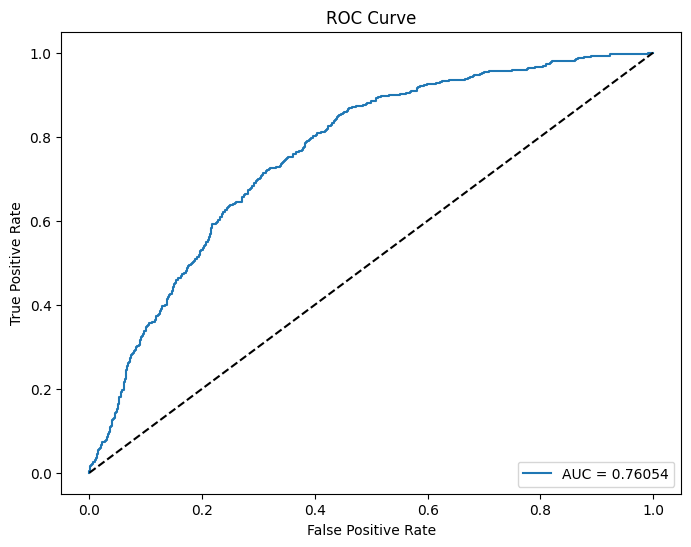

In [4259]:
LR_model = LogisticRegression(max_iter=1000)
evaluate_model(LR_model, X_train, X_test, Y_train, Y_test)

Accuracy: 0.73047

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0                   0.24
1          0          1                   0.51
2          0          0                   0.35
3          0          0                   0.39
4          1          1                   0.57
5          0          1                   0.57
6          0          0                   0.38
7          1          0                   0.41
8          0          0                   0.06
9          1          0                   0.41
10         0          0                   0.13
11         0          0                   0.40
12         0          0                   0.03
13         0          0                   0.49
14         0          0                   0.37
15         0          0                   0.40
16         0          0                   0.09
17         0          0                   0.13
18         1          1                   0.63
19         0       

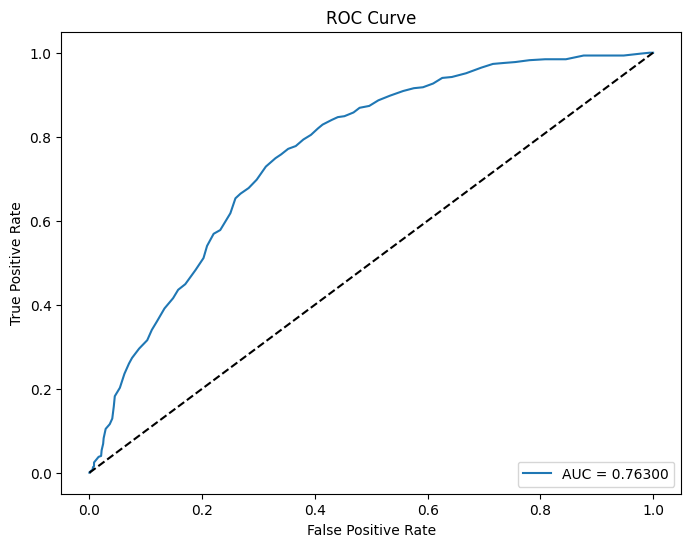

In [4260]:
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(RF_model, X_train, X_test, Y_train, Y_test)

Accuracy: 0.73047

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0               0.321554
1          0          1               0.572052
2          0          0               0.401928
3          0          0               0.382802
4          1          1               0.696234
5          0          1               0.635022
6          0          0               0.354104
7          1          0               0.448313
8          0          0               0.060556
9          1          1               0.574423
10         0          0               0.036356
11         0          1               0.597357
12         0          0               0.063465
13         0          0               0.494103
14         0          0               0.486888
15         0          0               0.414986
16         0          0               0.027212
17         0          0               0.031214
18         1          1               0.675729
19         0       

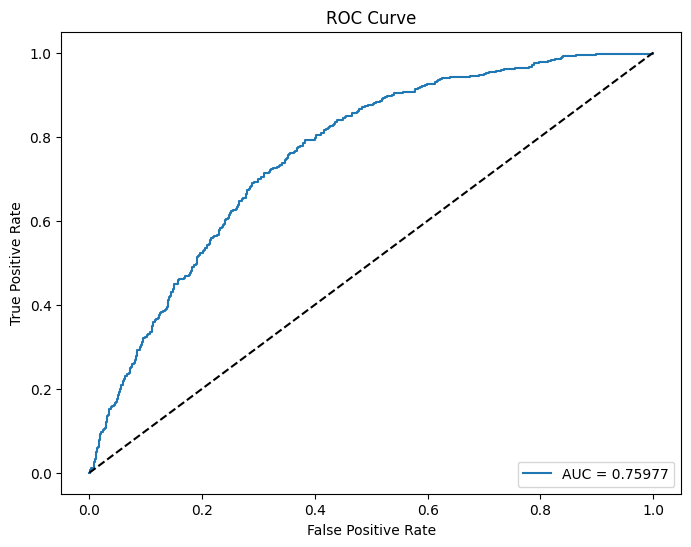

In [4261]:
catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist())
evaluate_model(catboost_model, X_train, X_test, Y_train, Y_test)

Accuracy: 0.73047

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0               0.274077
1          0          1               0.646908
2          0          0               0.222278
3          0          1               0.755297
4          1          1               0.612493
5          0          1               0.590654
6          0          0               0.468029
7          1          0               0.206013
8          0          0               0.196909
9          1          0               0.443058
10         0          0               0.161357
11         0          0               0.526552
12         0          0               0.175199
13         0          0               0.472183
14         0          0               0.338453
15         0          0               0.379008
16         0          0               0.130649
17         0          0               0.130383
18         1          1               0.619520
19         0       

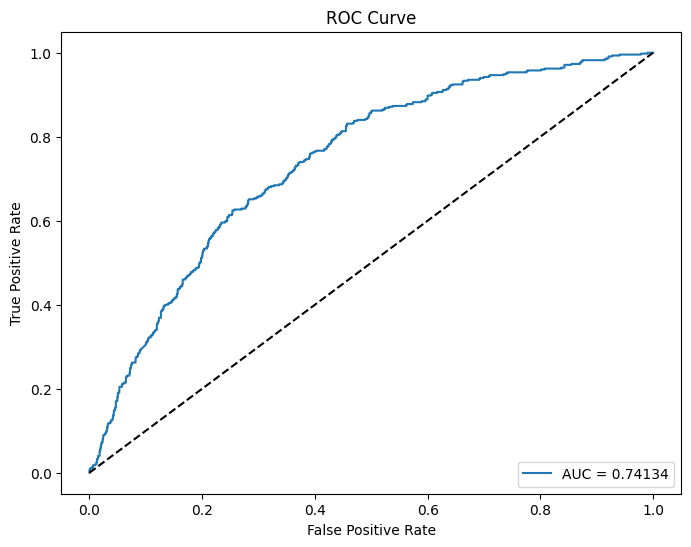

In [4262]:
svm_model = SVC(probability=True, random_state=42)
evaluate_model(svm_model, X_train, X_test, Y_train, Y_test)

### K-Fold

In [4154]:
def kFold_with_auc(X_train, y_train, k, model):
    # Create a k-fold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation and make predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=kf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred)
    
    # Calculate AUC score if the model supports probability predictions
    auc = None
    if hasattr(model, "predict_proba"):
        y_pred_proba = cross_val_predict(model, X_train, y_train, cv=kf, method='predict_proba')[:, 1]
        auc = roc_auc_score(y_train, y_pred_proba)
    
    return accuracy, auc

In [4155]:
def output_table_of_metrics(X_train, y_train, array_of_ks, models_dict, column_heading):
    # Initialize a list to store the results
    results = []

    # Perform k-fold cross-validation for each model and each k in the array
    for model_name, model in models_dict.items():
        for k in array_of_ks:
            accuracy, auc = kFold_with_auc(X_train, y_train, k, model)
            
            # Store the results
            results.append({
                'Model': model_name,
                'k': k,
                f'{column_heading} Accuracy': accuracy * 100,  # Convert accuracy to percentage
                f'{column_heading} AUC': auc * 100 if auc is not None else None  # Convert AUC to percentage
            })
    
    # Create a DataFrame from the results
    df_metrics = pd.DataFrame(results)
    
    # Sort by accuracy
    df_metrics = df_metrics.sort_values(by=f'{column_heading} Accuracy', ascending=False)
    
    # Return the DataFrame
    return df_metrics

In [4156]:
# # Define the models in a dictionary with model names as keys
# models_dict = {
#     'Random Forest': RF_model,
#     'Logistic Regression': LR_model,
#     'CatBoost': catboost_model
# }

# # Define the array of k values for k-fold cross-validation
# array_of_ks = [15]  # Example: test each model with 3, 5, and 10 folds

# # Output the table of accuracies and AUCs
# df_metrics = output_table_of_metrics(X_train, Y_train, array_of_ks, models_dict, 'Validation')
# print(df_metrics)

### Feature Selection

In [4157]:
def show_important_features(model_used):
    feature_names = X_train.keys()
    # Assuming feature_names is a list of feature names in the order they were used to train the model
    scores = model_used.feature_importances_
    
    # Sorting the features by their importance
    indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_scores = [scores[i] for i in indices]
    
    # Creating the horizontal bar chart
    plt.figure(figsize=(5, 6))
    plt.barh(sorted_feature_names, sorted_scores)
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return sorted_feature_names

In [4158]:
# Creates an empty array to be populated
included_features_model = [[None] * 35 for _ in range(4)]

# Convert data to numpy arrays
X = np.asarray(X_train, dtype=np.float32)
Y = np.asarray(Y_train, dtype=np.float32)

In [4159]:
def evaluate_features_with_rfe(model):
    # Define RFECV selector with StratifiedKFold cross-validation
    selector = RFE(model)

    # Fit RFECV selector to the data
    selector = selector.fit(X, Y)

    # Get the included features from the selector
    included_features = selector.support_

    # Update the included features for CatBoost model
    included_features_model[2] = included_features

    # Fit CatBoost model with the training data
    model.fit(X_train, Y_train)

    # Get important features from the trained CatBoost model
    droped = show_important_features(model)

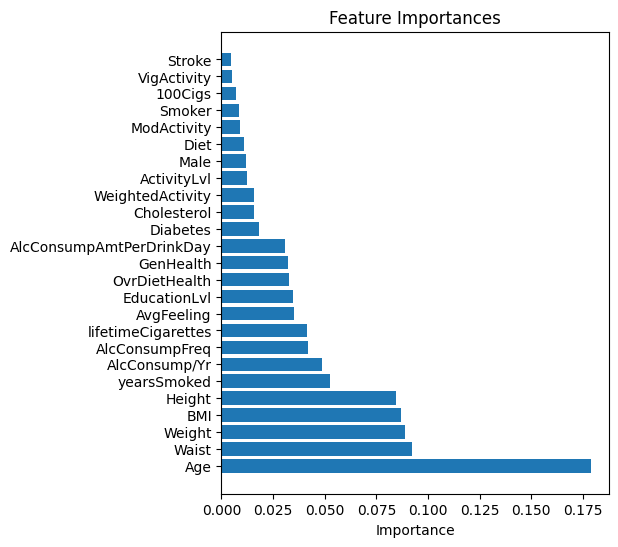

In [4160]:
evaluate_features_with_rfe(RF_model)

In [4161]:
X_train_RFdropped = X_train.drop(columns=['VigActivity', '100Cigs', 'ModActivity', 'Smoker', 'Diet', 'ActivityLvl', 'AlcConsump/Yr', 'BMI', 'AvgFeeling'])
X_test_RFdropped = X_test.drop(columns=['VigActivity', '100Cigs', 'ModActivity', 'Smoker', 'Diet', 'ActivityLvl', 'AlcConsump/Yr', 'BMI', 'AvgFeeling'])

Accuracy: 0.73175

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0                   0.37
1          0          1                   0.69
2          0          0                   0.44
3          0          0                   0.50
4          1          1                   0.60
5          0          1                   0.61
6          0          0                   0.38
7          1          0                   0.37
8          0          0                   0.12
9          1          1                   0.53
10         0          0                   0.08
11         0          1                   0.61
12         0          0                   0.04
13         0          0                   0.41
14         0          1                   0.59
15         0          1                   0.51
16         0          0                   0.03
17         0          0                   0.13
18         1          0                   0.48
19         0       

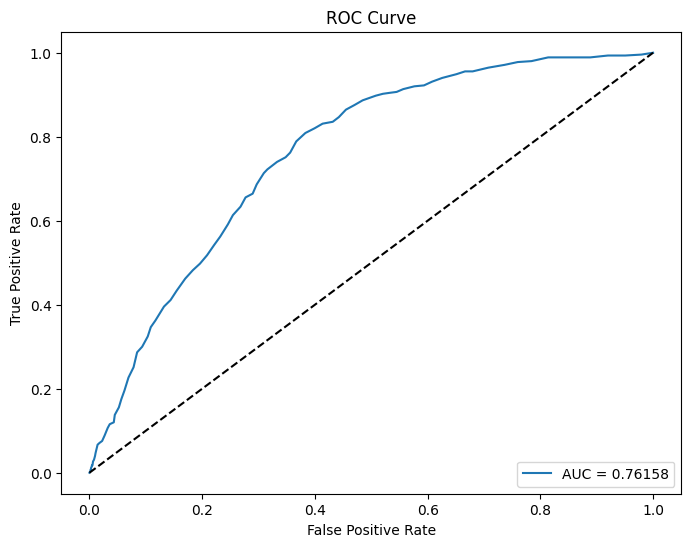

In [4162]:
evaluate_model(RF_model, X_train_RFdropped, X_test_RFdropped, Y_train, Y_test)

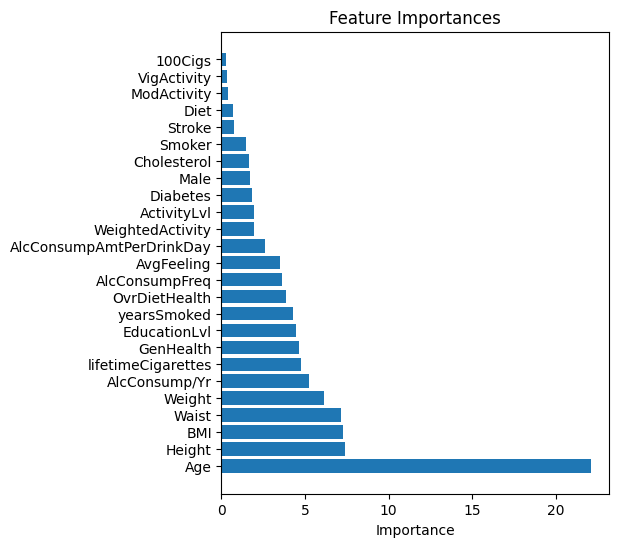

In [4163]:
evaluate_features_with_rfe(catboost_model)

In [4164]:
X_train_Catdropped = X_train.drop(columns=['VigActivity', '100Cigs', 'ModActivity', 'Smoker', 'Diet', 'ActivityLvl', 'AlcConsump/Yr', 'BMI', 'AvgFeeling'])
X_test_Catdropped = X_test.drop(columns=['VigActivity', '100Cigs', 'ModActivity', 'Smoker', 'Diet', 'ActivityLvl', 'AlcConsump/Yr', 'BMI', 'AvgFeeling'])

Accuracy: 0.74392

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0               0.319079
1          0          1               0.633088
2          0          0               0.392763
3          0          0               0.440218
4          1          1               0.727456
5          0          1               0.686736
6          0          0               0.301507
7          1          0               0.437297
8          0          0               0.074422
9          1          1               0.566084
10         0          0               0.033047
11         0          1               0.500674
12         0          0               0.064908
13         0          0               0.368994
14         0          1               0.617207
15         0          0               0.468385
16         0          0               0.026912
17         0          0               0.022371
18         1          1               0.648279
19         0       

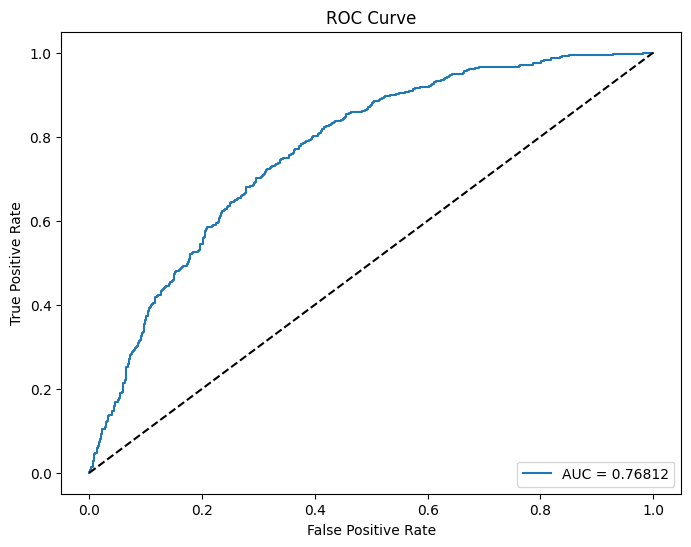

In [4165]:
evaluate_model(catboost_model, X_train_Catdropped, X_test_Catdropped, Y_train, Y_test)

### Hyperparameter Tuning

Accuracy: 0.74456

Comparison DataFrame:
      Actual  Predicted  Predicted_Probability
0          1          0               0.473153
1          0          1               0.559819
2          0          0               0.473909
3          0          1               0.539552
4          1          1               0.561368
5          0          1               0.548154
6          0          0               0.202941
7          1          0               0.295713
8          0          0               0.117684
9          1          0               0.457733
10         0          0               0.091164
11         0          1               0.514752
12         0          0               0.117368
13         0          0               0.494928
14         0          0               0.489496
15         0          0               0.423515
16         0          0               0.076913
17         0          0               0.071640
18         1          1               0.600113
19         0       

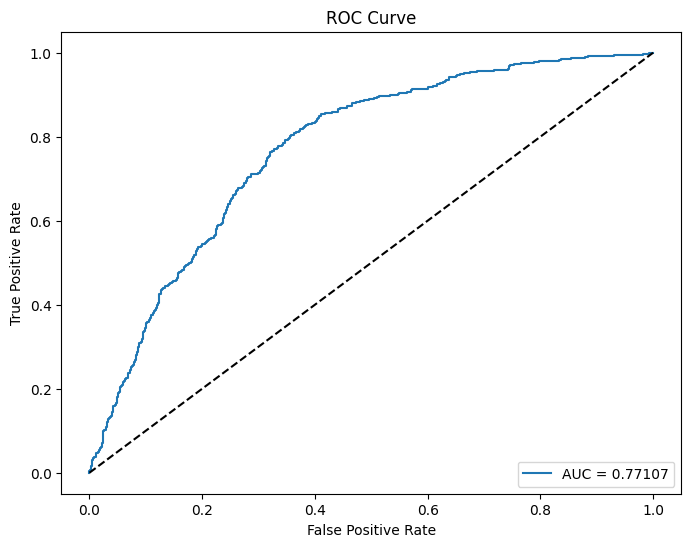

Best parameters found:  {'border_count': 128, 'depth': 3, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}


In [4166]:
#'scale_pos_weight': 1, 'random_strength': 1.0, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 3, 'border_count': 128, 'bagging_temperature': 0.0}
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist())

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

# Set up GridSearchCV
# grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
# grid_search.fit(X_train, Y_train)

# Get the best model from grid search
# best_catboost_model = grid_search.best_estimator_

# Manually set the best parameters
best_params = {'border_count': 128, 'depth': 3, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
best_catboost_model = CatBoostClassifier(verbose=0, random_state=42, cat_features=df.select_dtypes(include=['object', 'category']).columns.tolist(), **best_params)

# Train the model with the best parameters
best_catboost_model.fit(X_train, Y_train)

# Evaluate the best model using the provided evaluate_model function
evaluate_model(best_catboost_model, X_train_Catdropped, X_test_Catdropped, Y_train, Y_test)

# Output best parameters
print("Best parameters found: ", best_params)

In [4167]:
# catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# # Define the parameter grid for random search
# param_distributions = {
#     'iterations': [100, 200, 500, 1000],  # Number of boosting iterations
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
#     'depth': [3, 5, 7, 9],  # Depth of the tree
#     'l2_leaf_reg': [1, 3, 5, 7, 9],  # L2 regularization term on weights
#     'border_count': [32, 64, 128],  # Number of splits for numerical features
#     'bagging_temperature': [0.0, 0.5, 1.0],  # Control for bagging strength
#     'random_strength': [0.1, 0.5, 1.0, 2.0],  # Random strength for scoring splits
#     'scale_pos_weight': [1, 2, 3, 4]  # Balancing of positive and negative weights
# }

# # Define the RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=catboost_model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings sampled
#     scoring='roc_auc',  # Scoring metric to use
#     n_jobs=-1,  # Use all available cores
#     cv=5,  # 5-fold cross-validation
#     verbose=3,  # Verbosity level
#     random_state=42
# )

# # Perform the random search
# random_search.fit(X_train, Y_train)

# # Print the best parameters and the best score from the random search
# print("Best parameters found by random search:")
# print(random_search.best_params_)

# print("\nBest AUC score from random search:")
# print(f"{random_search.best_score_:.5f}")

In [4170]:
# Define the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)

# Define the parameter grid centered around the best parameters found by the random search
param_grid = {
    'iterations': [400, 500, 600],  # Centered around 500
    'learning_rate': [0.005, 0.01, 0.015],  # Centered around 0.01
    'depth': [2, 3],  # Centered around 3
    'l2_leaf_reg': [4, 5, 6],  # Centered around 5
    'border_count': [116, 128, 140],  # Centered around 128
    'bagging_temperature': [0.0, 0.12],  # Centered around 0.0
    'random_strength': [1.0],  # Centered around 1.0
    'scale_pos_weight': [1]  # Centered around 1
}

# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Scoring metric to use
    n_jobs=-1,  # Use all available cores
    cv=3,  # 5-fold cross-validation
    verbose=3  # Verbosity level
)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score from the grid search
print("Best parameters found by grid search:")
print(grid_search.best_params_)

print("\nBest AUC score from grid search:")
print(f"{grid_search.best_score_:.5f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\larry\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found by grid search:
{'bagging_temperature': 0.0, 'border_count': 116, 'depth': 3, 'iterations': 400, 'l2_leaf_reg': 4, 'learning_rate': 0.015, 'random_strength': 1.0, 'scale_pos_weight': 1}

Best AUC score from grid search:
0.76600
